In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
# =============================================================
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# =============================================================
pd.set_option("display.max_columns", None)
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Load dataset

In [ ]:
# load data
mc = pd.read_csv("/content/Marketing campaign dataset.csv")
mc.head(3)

campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   

   creative_id  creative_width  creative_height  \
0         1000           300.0            250.0   
1         1000           300.0            250.0   
2         1000           300.0            250.0   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/           4756   
2  https://www.abcjewelry.com/collections/boho-je...           4756   

  advertiser_name  network_id  approved_budget advertiser_currency  \
0             Web         190            400.0                 SGD   
1             Web         190            400.0                 SGD   
2             Web         190            400.0                 SGD   

   channel_id channel_name  max_bid_cpm  network_margin  campaign_budget_usd  \
0          32       Mobile          NaN             0.0           652.173913   
1           8       Social          NaN             0.0           652.173913   
2           8       Social          NaN             0.0           652.173913   

   impressions  clicks stats_currency currency_code  exchange_rate  \
0          837       8            SGD           SGD              1   
1         2634      44            SGD           SGD              1   
2         2135      32            SGD           SGD              1   

   media_cost_usd  position_in_content  unique_reach  total_reach  \
0       14.058514                  NaN           NaN          NaN   
1       99.633496                  NaN           NaN          NaN   
2      109.419677                  NaN           NaN          NaN   

  search_tag_cat cmi_currency_code        timezone weekday_cat  \
0         Others               SGD  Asia/Singapore    week_end   
1         Others               SGD  Asia/Singapore    week_day   
2         Others               SGD  Asia/Singapore    week_day   

             keywords  
0  delicate bracelets  
1      summer jewelry  
2     artisan jewelry

Data Information.

Source: https://www.kaggle.com/datasets/rahulchavan99/marketing-campaign-dataset

* campaign_item_id: unique id of each advertising campaign
* no_of_days: number of days the campaign has been running
*  time: timestamp on which the data was captured
* ext_service_id: id of each advertising platform used
* ext_service_name: name of each advertising platform used
* creative_id: id of the creative images used for ads
* creative_height: height of the creative image for the ad in pixels
* creative_width: width of the creative image for the ad in pixels
* search_tags: search tags used for displaying ads
* template_id: template used in the creative image
* landing_page: landing page URL on which users clicked or browsed through
* advertiser_id: id of the advertiser
* advertiser_name: name of the place of the advertiser (city, country, state)
* network_id: id of each agency
* advertiser_currency: currency of the country in which the advertiser operates in
* channel_id: id of each channel used for placed ads
* channel_name: name of the channel (display, search, social, mobile video)
* max_bid_cpm: maximum value of bid for optimizing CPM
* campaign_budget_usd: overall budget of the campaign or the amount of * money that the campaign can spend
* impressions: the number of times an advertisement is displayed on a website or social media platform.
* clicks: the number of times an advertisement is clicked on by a user, leading them to the advertiser's website or landing page.
* currency_code: the currency code of the advertiser
* exchange_rate: a relative price of one currency expressed in terms of another currency.
* media_cost_usd: the amount of money that the campaign has spent on that particular day
* position_in_content: position where the ad was placed on the website page
* unique_reach: the number of unique users who see your post or page.
* total_reach: the number of people who saw any content from your page or about your page.
* search_tags: a word or set of words a person enters when searching on Google or one of our Search Network sites.
* cmi_currency_code: campaign currency code
* time_zone: timezone in which the campaign is running
* weekday_cat: weekday/weekend category
* keywords: a word or set of words that Google Ads advertisers can add to a given ad group so that your ads are targeting the right audience.

In [ ]:
# view number of rows and columns
mc.shape

(72612, 35)

In [ ]:
# view data structure
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [ ]:
# count number of missing values
mc.isnull().sum().sort_values(ascending = False)

unique_reach           72612
total_reach            72612
position_in_content    72612
max_bid_cpm            65206
creative_width          3412
creative_height         3412
template_id             3412
approved_budget          406
exchange_rate              0
clicks                     0
stats_currency             0
currency_code              0
campaign_item_id           0
media_cost_usd             0
campaign_budget_usd        0
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
impressions                0
channel_name               0
network_margin             0
no_of_days                 0
channel_id                 0
advertiser_currency        0
network_id                 0
advertiser_name            0
advertiser_id              0
landing_page               0
search_tags                0
creative_id                0
ext_service_name           0
ext_service_id             0
time                       0
keywords      

In [ ]:
# drop the columns with most values missing
mc.drop(columns=['position_in_content','unique_reach','total_reach','max_bid_cpm'],inplace=True)

In [ ]:
# drop the rows with missing values
mc2 = mc.dropna()
mc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68880 entries, 0 to 69199
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     68880 non-null  int64  
 1   no_of_days           68880 non-null  int64  
 2   time                 68880 non-null  object 
 3   ext_service_id       68880 non-null  int64  
 4   ext_service_name     68880 non-null  object 
 5   creative_id          68880 non-null  int64  
 6   creative_width       68880 non-null  float64
 7   creative_height      68880 non-null  float64
 8   search_tags          68880 non-null  object 
 9   template_id          68880 non-null  float64
 10  landing_page         68880 non-null  object 
 11  advertiser_id        68880 non-null  int64  
 12  advertiser_name      68880 non-null  object 
 13  network_id           68880 non-null  int64  
 14  approved_budget      68880 non-null  float64
 15  advertiser_currency  68880 non-null 

In [ ]:
# The formula for calculating CTR is:
# CTR = (Clicks / Impressions) x 100
# Calculate CTR and add it to the DataFrame using .loc
mc2.loc[:, "ctr"] = (mc2["clicks"] / mc2["impressions"]) * 100

<ipython-input-8-7de536fc857f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc2.loc[:, "ctr"] = (mc2["clicks"] / mc2["impressions"]) * 100


In [ ]:
# view statistical summary of numeric data
mc2.describe()

campaign_item_id    no_of_days  ext_service_id   creative_id  \
count      68880.000000  68880.000000    68880.000000  68880.000000   
mean        3129.914765     27.910235       49.433275   7114.539562   
std          141.972004     25.786337       55.877468   3833.781256   
min         2733.000000      0.000000        4.000000   1000.000000   
25%         3149.000000      9.000000        4.000000   3475.000000   
50%         3175.000000     20.000000       16.000000   7165.000000   
75%         3202.000000     38.000000      128.000000  10485.000000   
max         3960.000000    118.000000      128.000000  13710.000000   

       creative_width  creative_height   template_id  advertiser_id  \
count    68880.000000     68880.000000  68880.000000   68880.000000   
mean       267.661150       223.050958     83.046211    6196.796298   
std         93.037517        77.531264     20.888900     392.197543   
min          0.000000         0.000000     23.000000    4756.000000   
25%        300.000000       250.000000     90.000000    6331.000000   
50%        300.000000       250.000000     90.000000    6385.000000   
75%        300.000000       250.000000     90.000000    6394.000000   
max        300.000000       250.000000     93.000000    6490.000000   

         network_id  approved_budget    channel_id  network_margin  \
count  68880.000000     6.888000e+04  68880.000000         68880.0   
mean     344.916042     9.770069e+04     21.876641             0.0   
std       24.202476     5.050085e+05     23.762774             0.0   
min      188.000000     4.000000e+02      1.000000             0.0   
25%      353.000000     6.000000e+03      4.000000             0.0   
50%      353.000000     1.000000e+04      8.000000             0.0   
75%      353.000000     1.500000e+04     32.000000             0.0   
max      353.000000     6.000000e+06     64.000000             0.0   

       campaign_budget_usd    impressions        clicks  exchange_rate  \
count         68880.000000   68880.000000  68880.000000        68880.0   
mean            532.476686    1127.699158     33.171603            1.0   
std             591.363295    2569.948322    268.247119            0.0   
min               2.452316     511.000000      2.000000            1.0   
25%             196.185286     524.000000      5.000000            1.0   
50%             367.847411     568.000000      8.000000            1.0   
75%             700.272480     743.000000     11.000000            1.0   
max           12265.423770  153959.000000  31807.000000            1.0   

       media_cost_usd           ctr  
count    68880.000000  68880.000000  
mean         8.826412      1.562607  
std         28.029980      2.323680  
min          0.000000      0.088731  
25%          0.406993      0.917431  
50%          1.495146      1.353965  
75%          6.461064      1.788909  
max       2295.028945    265.611691

# Exploratory Data Analysis

## Data Transformation


In [ ]:
# Create a function for log transformation
def log_transform_features(data, features_to_transform):
    # Make a copy of the original data to avoid modifying it
    transformed_data = data.copy()

    # Apply log transformation to the specified features
    for feature in features_to_transform:
        transformed_data[feature] = np.log1p(transformed_data[feature])

    return transformed_data

# Define the numerical features you want to transform
numerical_features_to_transform = ["impressions", "clicks", "ctr", "media_cost_usd", "no_of_days", "approved_budget", "campaign_budget_usd"]

# Apply log transformation to the selected features
mc2_transformed = log_transform_features(mc2, numerical_features_to_transform)

In [ ]:
# numerical feature
numerical_features = mc2_transformed[["impressions", "clicks", "ctr", "media_cost_usd", "no_of_days", "approved_budget", "campaign_budget_usd"]]
numerical_features.head()

impressions    clicks       ctr  media_cost_usd  no_of_days  \
0     6.731018  2.197225  0.670797        2.711944    2.079442   
1     7.876638  3.806662  0.982252        4.611485    2.197225   
2     7.666690  3.496508  0.915822        4.704288    2.302585   
3     7.752765  3.891820  1.119311        4.755395    2.397895   
4     7.338888  3.044522  0.833079        4.219362    2.484907   

   approved_budget  campaign_budget_usd  
0         5.993961             6.481843  
1         5.993961             6.481843  
2         5.993961             6.481843  
3         5.993961             6.481843  
4         5.993961             6.481843

## Boxplots of numerical features

Text(0.5, 0.98, 'Box Plot of Numerical Features')

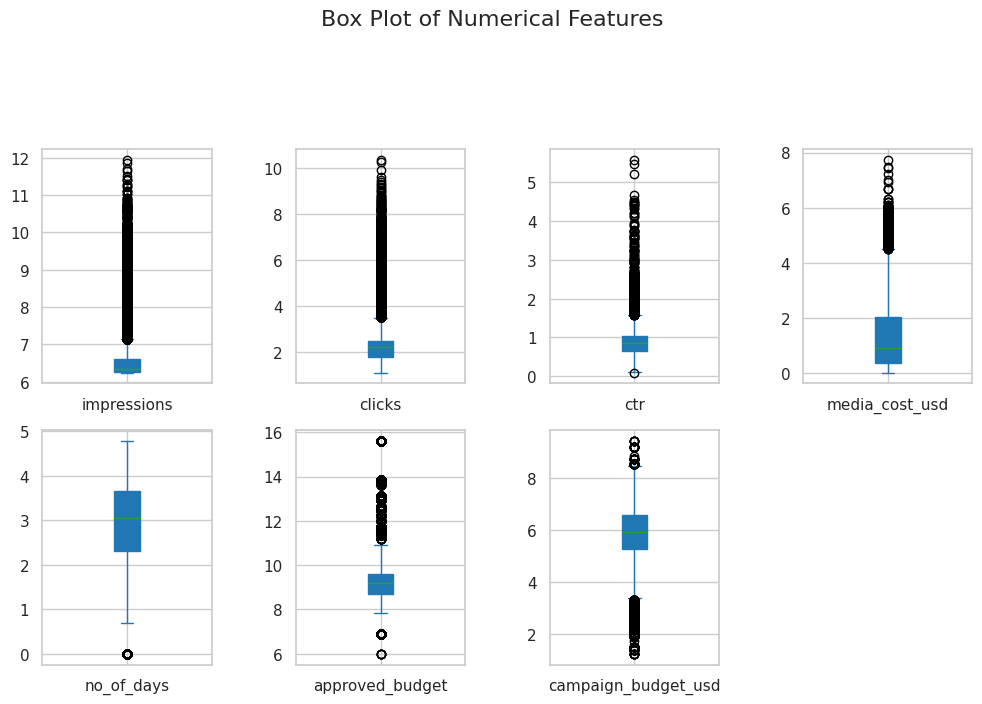

In [ ]:
# plot columns
numerical_features.plot(subplots = True, layout = (4,4), kind = "box",
              figsize=(12,14), patch_artist = True)
plt.subplots_adjust(wspace = 0.5)

# Add a title to the entire subplot
plt.suptitle('Box Plot of Numerical Features', fontsize=16)

# Save the plot as an image file (e.g., PNG)
# plt.savefig('num_ft_box_plot.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('num_ft_box_plot.png')

In [ ]:
mc2['ctr'].median()

1.3539651837524178

## Histogram to show distribution of some features

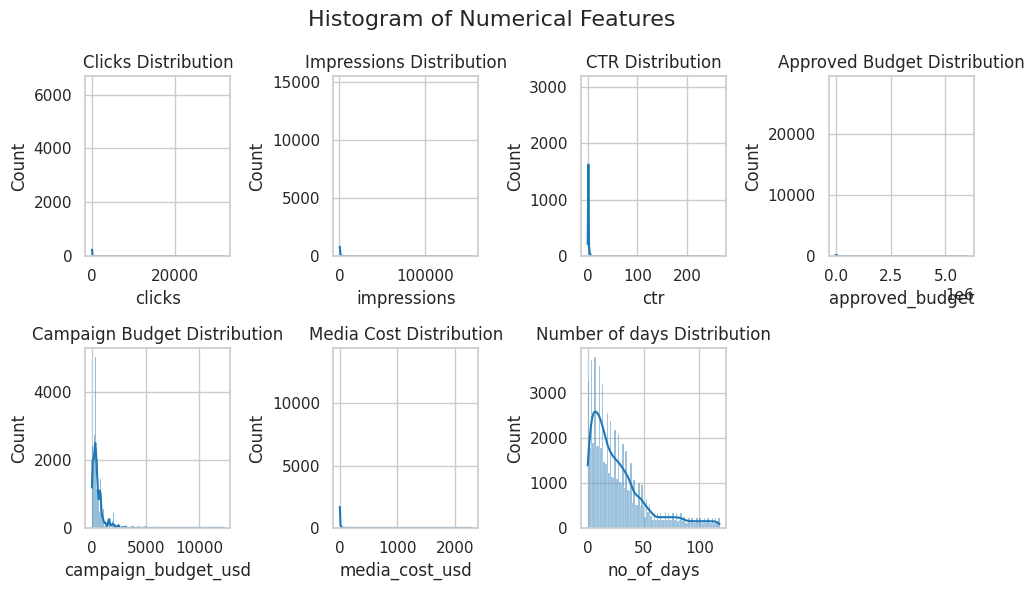

In [ ]:
# Using the data without transformation:

# Define the numerical features and titles for histograms
features_and_titles = [
    ("clicks", "Clicks Distribution"),
    ("impressions", "Impressions Distribution"),
    ("ctr", "CTR Distribution"),
    ("approved_budget", "Approved Budget Distribution"),
    ("campaign_budget_usd", "Campaign Budget Distribution"),
    ("media_cost_usd", "Media Cost Distribution"),
    ("no_of_days", "Number of days Distribution")
]

# Create a new figure and define the number of rows and columns for subplots
num_plots = len(features_and_titles)
num_cols = 4
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

# Plot the histograms
for i, (feature, title) in enumerate(features_and_titles):
    ax = axes[i]
    sns.histplot(mc2[feature], ax=ax, kde=True)
    ax.set_title(title)

# Add a title to the entire subplot
plt.suptitle('Histogram of Numerical Features', fontsize=16)

# Remove any empty subplots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes[i])

# Add spacing between subplots
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('num_ft_histogram.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('num_ft_histogram.png')


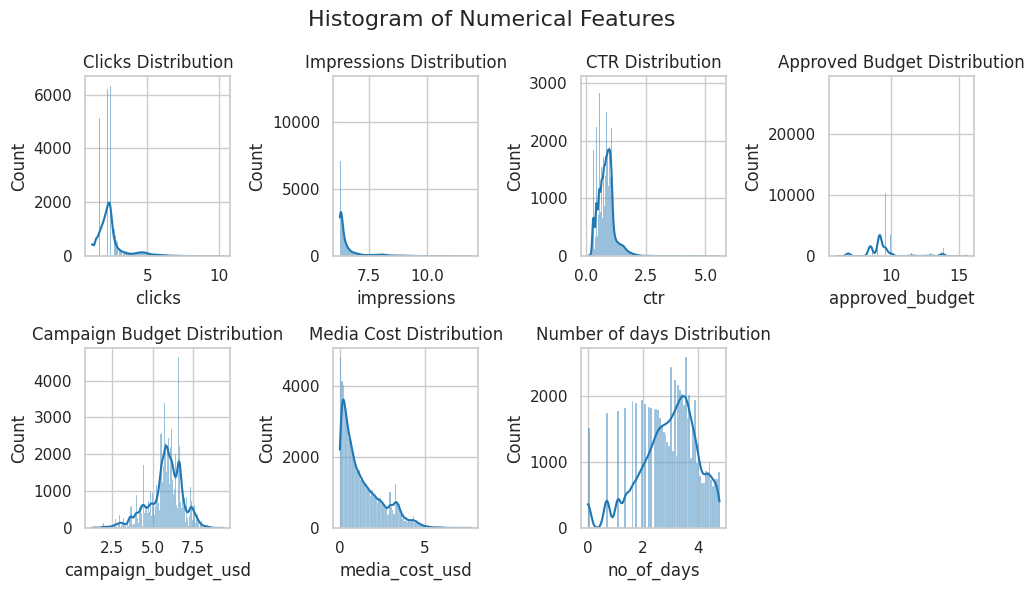

In [ ]:
# To use the transformed data for the histogram plots

# Define the numerical features and titles for histograms
features_and_titles = [
    ("clicks", "Clicks Distribution"),
    ("impressions", "Impressions Distribution"),
    ("ctr", "CTR Distribution"),
    ("approved_budget", "Approved Budget Distribution"),
    ("campaign_budget_usd", "Campaign Budget Distribution"),
    ("media_cost_usd", "Media Cost Distribution"),
    ("no_of_days", "Number of days Distribution")
]

# Create a new figure and define the number of rows and columns for subplots
num_plots = len(features_and_titles)
num_cols = 4
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

# Plot the histograms
for i, (feature, title) in enumerate(features_and_titles):
    ax = axes[i]
    sns.histplot(mc2_transformed[feature], ax=ax, kde=True)
    ax.set_title(title)

# Add a title to the entire subplot
plt.suptitle('Histogram of Numerical Features', fontsize=16)

# Remove any empty subplots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes[i])

# Add spacing between subplots
plt.tight_layout()

# Show the combined figure
#plt.show()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('num_ft_histogram(1).png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('num_ft_histogram(1).png')


# # Save the plot as an image file within Google Colab (no need for bbox_inches='tight')
# plt.savefig('/content/num_ft_histogram(1).png')

# # Provide the file path for manual download
# '/content/num_ft_histogram(1).png'


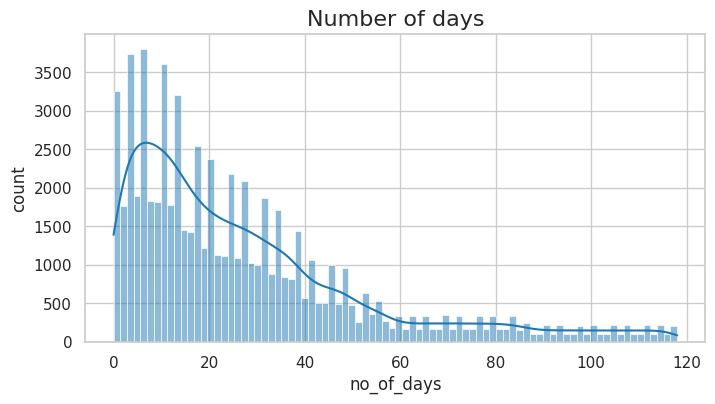

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(mc2["no_of_days"], kde = True)
plt.title("Number of days", size = 16)
plt.ylabel("count");

## Correlation

<ipython-input-18-17af3678522d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mc2.drop(columns=['exchange_rate', 'network_margin']).corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'campaign_item_id'),
  Text(0, 1.5, 'no_of_days'),
  Text(0, 2.5, 'ext_service_id'),
  Text(0, 3.5, 'creative_id'),
  Text(0, 4.5, 'creative_width'),
  Text(0, 5.5, 'creative_height'),
  Text(0, 6.5, 'template_id'),
  Text(0, 7.5, 'advertiser_id'),
  Text(0, 8.5, 'network_id'),
  Text(0, 9.5, 'approved_budget'),
  Text(0, 10.5, 'channel_id'),
  Text(0, 11.5, 'campaign_budget_usd'),
  Text(0, 12.5, 'impressions'),
  Text(0, 13.5, 'clicks'),
  Text(0, 14.5, 'media_cost_usd'),
  Text(0, 15.5, 'ctr')])

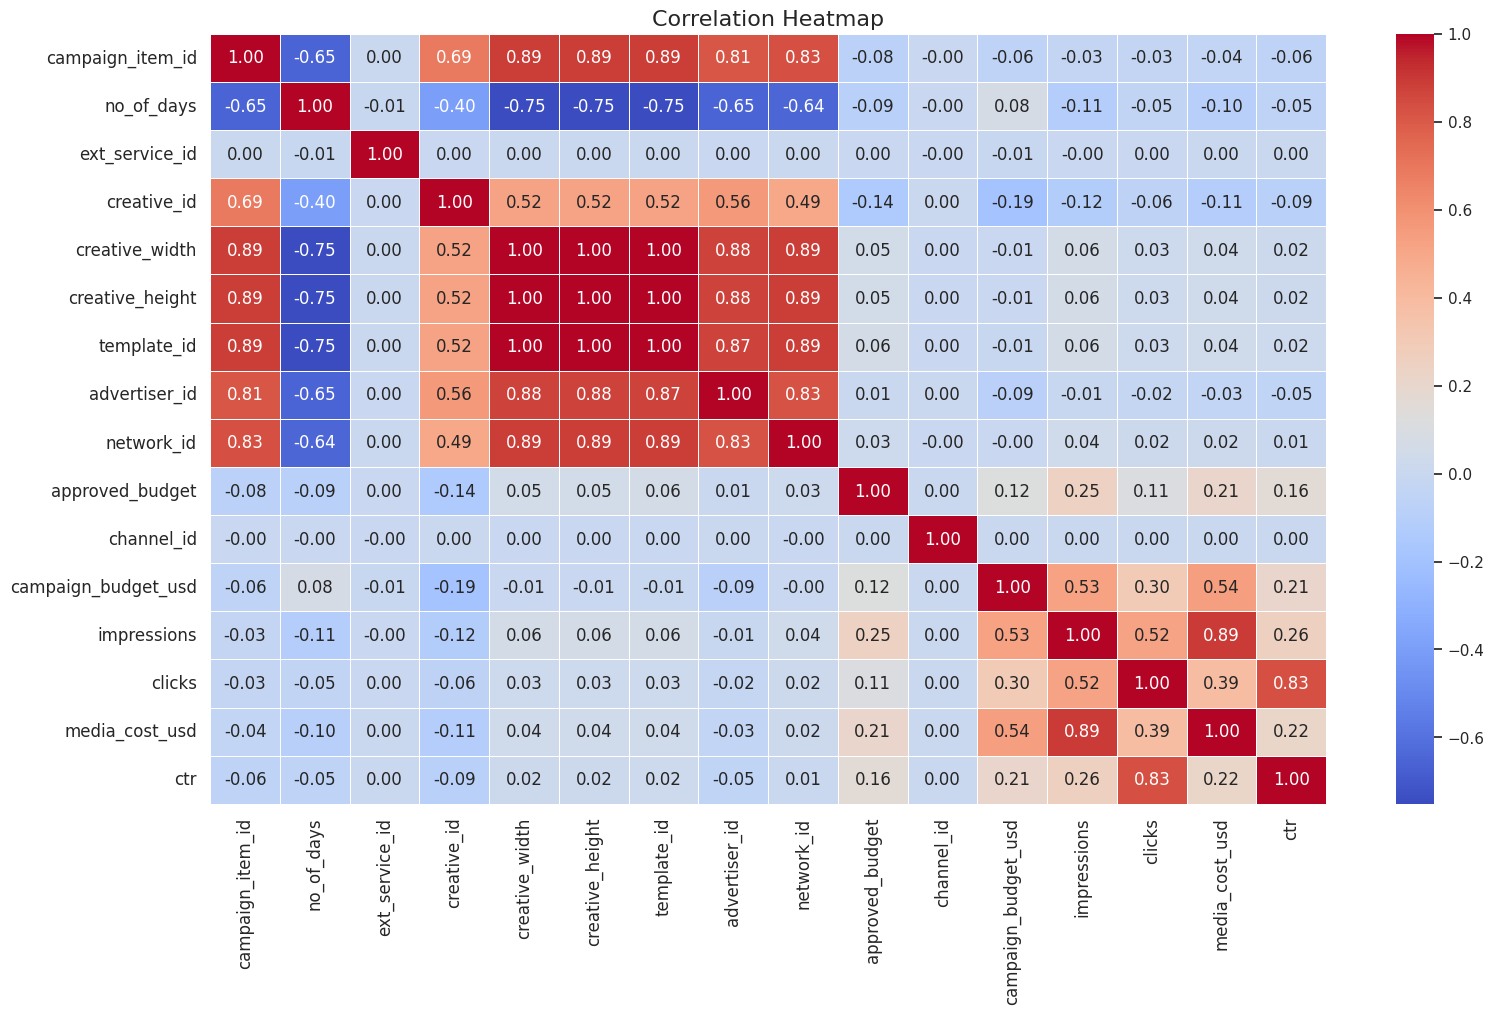

In [ ]:
# compute correlation matrix
correlation_matrix = mc2.drop(columns=['exchange_rate', 'network_margin']).corr()

# plot correlations using clustered heatmap
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as an image file (e.g., PNG)
# plt.savefig('mc2_corr_heatmap.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('mc2_corr_heatmap.png')

## Time series plot

<ipython-input-19-9b9b1edfcd05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc2['time'] = pd.to_datetime(mc2['time'])


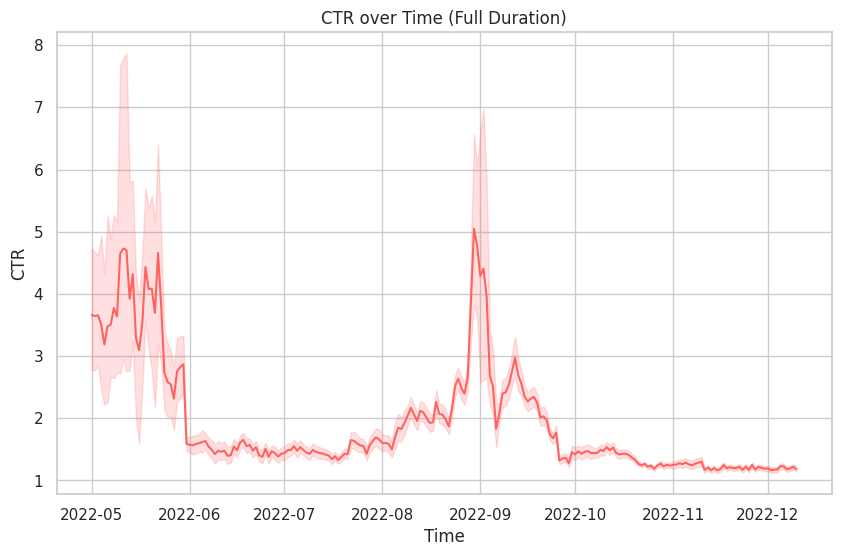

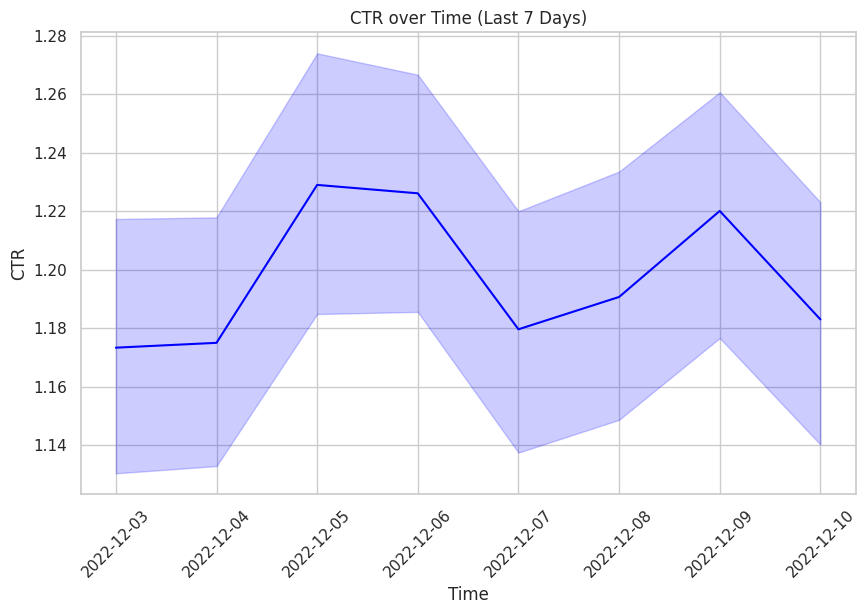

In [ ]:
# Convert 'time' column to datetime
mc2['time'] = pd.to_datetime(mc2['time'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=mc2, color='#FF6361')
plt.title('CTR over Time (Full Duration)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=0)

# Save the plot as an image file (e.g., PNG)
# plt.savefig('ctr_over_time.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('ctr_over_time.png')

# CTR over last 7 days
last_7_days = pd.to_datetime(mc2['time'].max()) - pd.DateOffset(days=7)
mc2_last_7_days = mc2[mc2['time'] >= last_7_days]

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=mc2_last_7_days, color='#0000FF')
plt.title('CTR over Time (Last 7 Days)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)

plt.show()

## Scatter plots

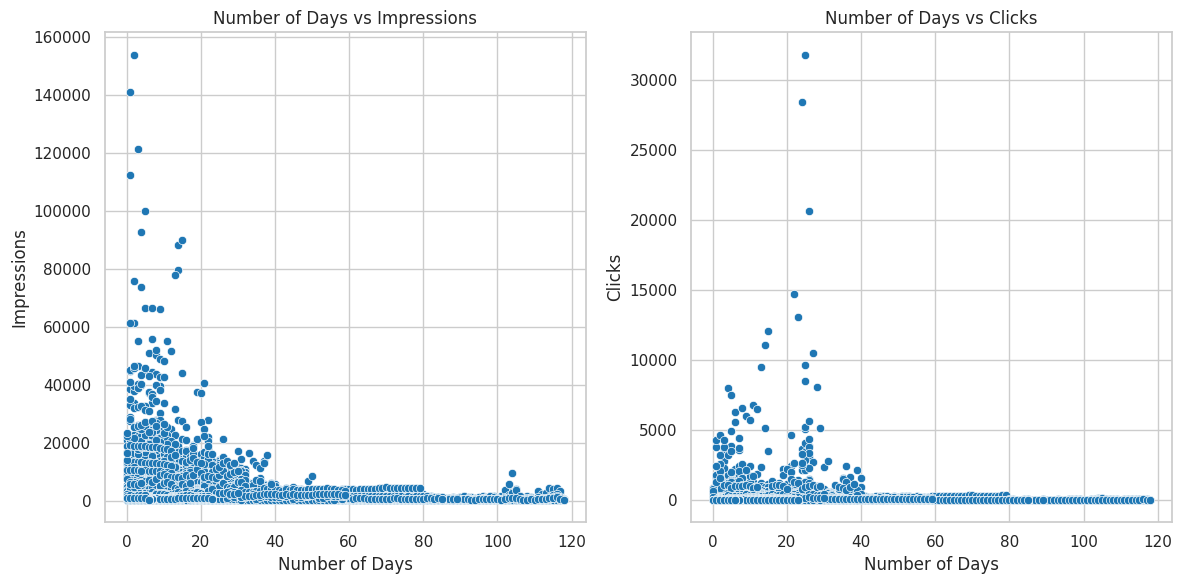

In [ ]:
# scatter plots for no of days vs impressions

# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot: no_of_days vs impressions
sns.scatterplot(data=mc2, x="no_of_days", y="impressions", ax=axes[0])
axes[0].set_xlabel("Number of Days")
axes[0].set_ylabel("Impressions")
axes[0].set_title("Number of Days vs Impressions")

# Scatter plot: no_of_days vs clicks
sns.scatterplot(data=mc2, x="no_of_days", y="clicks", ax=axes[1])
axes[1].set_xlabel("Number of Days")
axes[1].set_ylabel("Clicks")
axes[1].set_title("Number of Days vs Clicks")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

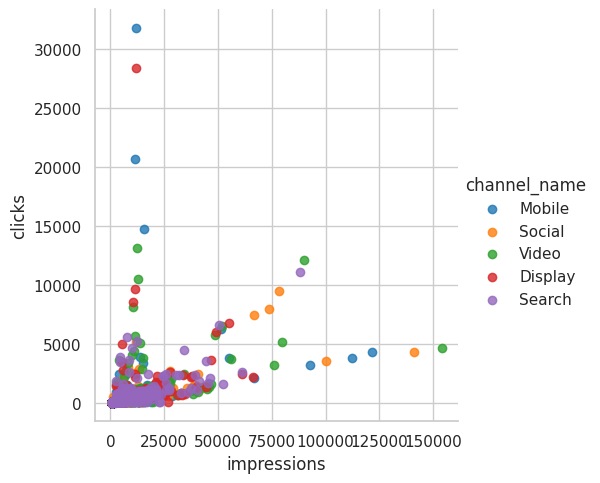

In [ ]:
#impressions and click with channel distributions
sns.lmplot(x = "impressions", y = "clicks", data = mc2, fit_reg=False, hue='channel_name')

# Save the plot as an image file (e.g., PNG)
# plt.savefig('ctr_imp_chn.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('ctr_imp_chn.png')

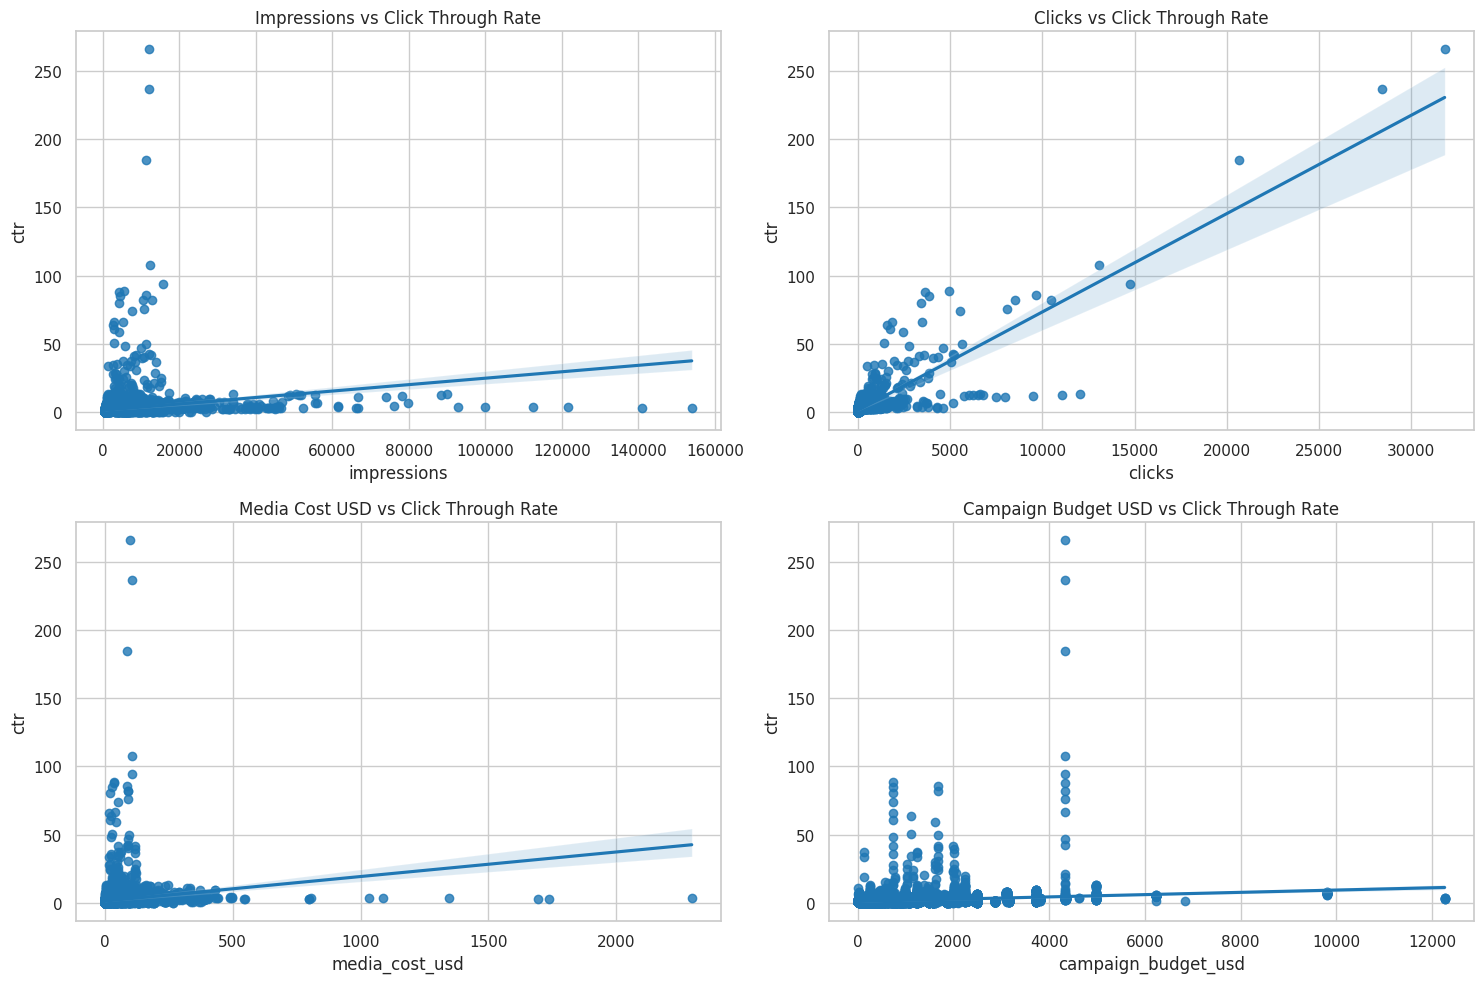

In [ ]:
# to visualize the significant factors mentioned
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))

# Plot 1
# Plot to show the relationship between ctr and impressions

sns.regplot(x = "impressions", y = "ctr", data = mc2,
           ax = axes[0, 0])
axes[0, 0].set_title("Impressions vs Click Through Rate")

# Plot 2
# Plot to show the relationship between ctr and clicks
# plt.figure(figsize = (4,4))

sns.regplot(x = "clicks", y = "ctr", data = mc2,
           ax = axes[0, 1])
axes[0, 1].set_title("Clicks vs Click Through Rate")


# Plot 3
# Plot to show the relationship between ctr and media_cost_usd
# plt.figure(figsize = (4,4))
sns.regplot(x = "media_cost_usd", y = "ctr", data = mc2,
           ax = axes[1, 0])
axes[1, 0].set_title("Media Cost USD vs Click Through Rate")


# Plot 4
# Plot to show the relationship between ctr and campaign_budget_usd
sns.regplot(x = "campaign_budget_usd", y = "ctr", data = mc2,
           ax = axes[1, 1])
axes[1, 1].set_title("Campaign Budget USD vs Click Through Rate")

# Set spacing between subplots
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('scatter_plots.png', bbox_inches='tight')

# Download the saved image to your local drive
# files.download('scatter_plots.png')

In [ ]:
# view table
mc2.head(3)

campaign_item_id  no_of_days       time  ext_service_id ext_service_name  \
0              2733           7 2022-05-01             128     Facebook Ads   
1              2733           8 2022-05-02              16            DV360   
2              2733           9 2022-05-03             128     Facebook Ads   

   creative_id  creative_width  creative_height  \
0         1000           300.0            250.0   
1         1000           300.0            250.0   
2         1000           300.0            250.0   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/           4756   
2  https://www.abcjewelry.com/collections/boho-je...           4756   

  advertiser_name  network_id  approved_budget advertiser_currency  \
0             Web         190            400.0                 SGD   
1             Web         190            400.0                 SGD   
2             Web         190            400.0                 SGD   

   channel_id channel_name  network_margin  campaign_budget_usd  impressions  \
0          32       Mobile             0.0           652.173913          837   
1           8       Social             0.0           652.173913         2634   
2           8       Social             0.0           652.173913         2135   

   clicks stats_currency currency_code  exchange_rate  media_cost_usd  \
0       8            SGD           SGD              1       14.058514   
1      44            SGD           SGD              1       99.633496   
2      32            SGD           SGD              1      109.419677   

  search_tag_cat cmi_currency_code        timezone weekday_cat  \
0         Others               SGD  Asia/Singapore    week_end   
1         Others               SGD  Asia/Singapore    week_day   
2         Others               SGD  Asia/Singapore    week_day   

             keywords       ctr  
0  delicate bracelets  0.955795  
1      summer jewelry  1.670463  
2     artisan jewelry  1.498829

In [ ]:
def convert_object_to_categorical(df):
    """
    Converts columns with object data type to categorical data type in a DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    pd.DataFrame: DataFrame with object columns converted to categorical.
    """
    # Create a copy of the DataFrame
    df_copy = df.copy()

    # Identify columns with object data type in the copy
    object_cols = df_copy.select_dtypes(include=['object']).columns

    # Convert identified columns to categorical
    for col in object_cols:
        df_copy[col] = pd.Categorical(df_copy[col])

    return df_copy

In [ ]:
# Pass mc2 DataFrame to the function to convert object columns to categorical.
mc3 = convert_object_to_categorical(mc2)

In [ ]:
# view mc3 data structure
mc3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68880 entries, 0 to 69199
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   campaign_item_id     68880 non-null  int64         
 1   no_of_days           68880 non-null  int64         
 2   time                 68880 non-null  datetime64[ns]
 3   ext_service_id       68880 non-null  int64         
 4   ext_service_name     68880 non-null  category      
 5   creative_id          68880 non-null  int64         
 6   creative_width       68880 non-null  float64       
 7   creative_height      68880 non-null  float64       
 8   search_tags          68880 non-null  category      
 9   template_id          68880 non-null  float64       
 10  landing_page         68880 non-null  category      
 11  advertiser_id        68880 non-null  int64         
 12  advertiser_name      68880 non-null  category      
 13  network_id           68880 non-

## Barplots

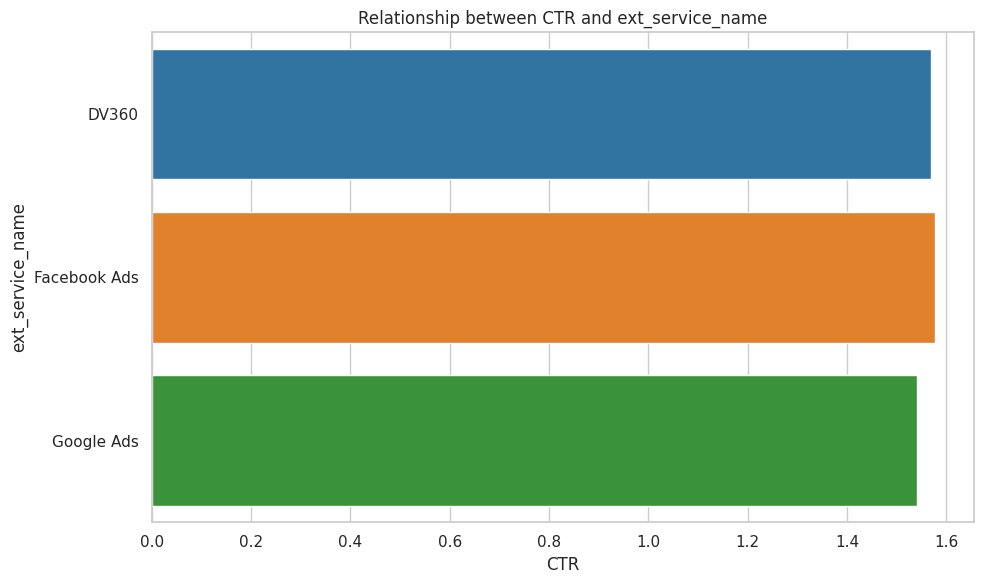

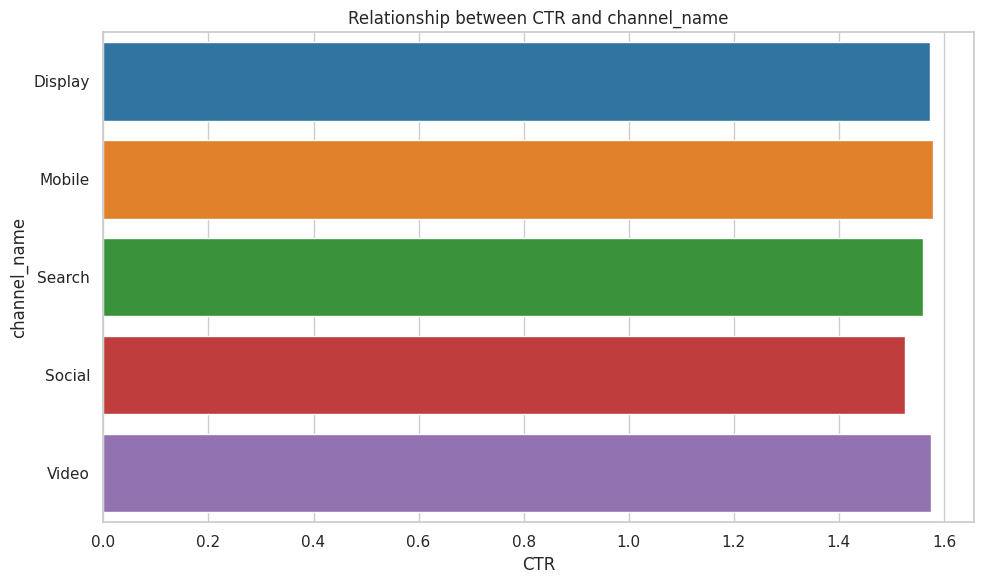

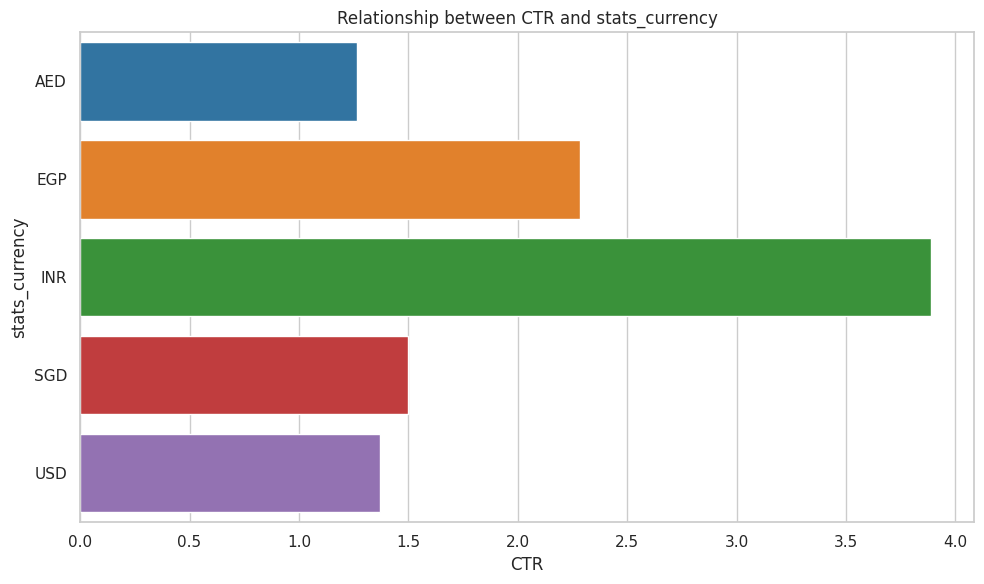

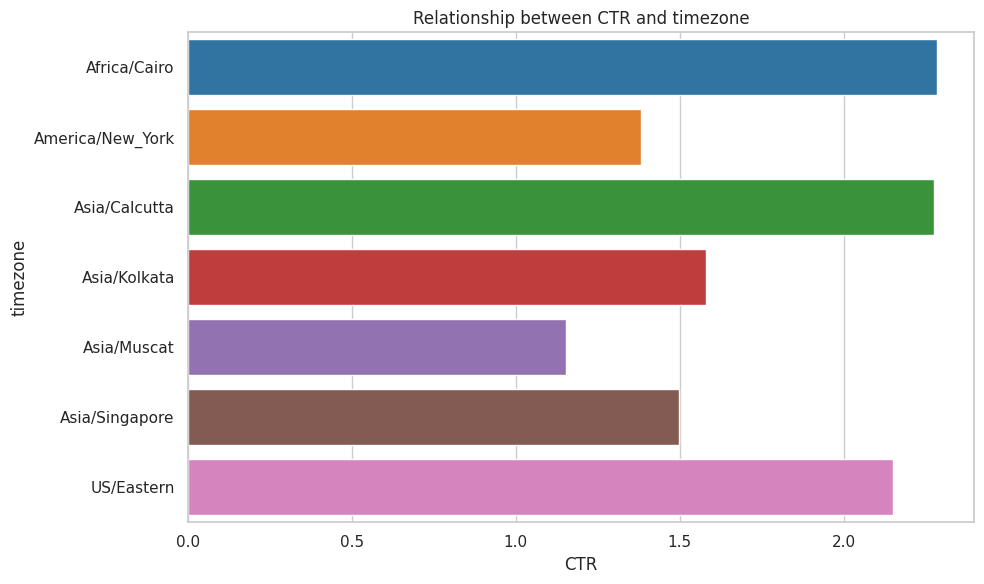

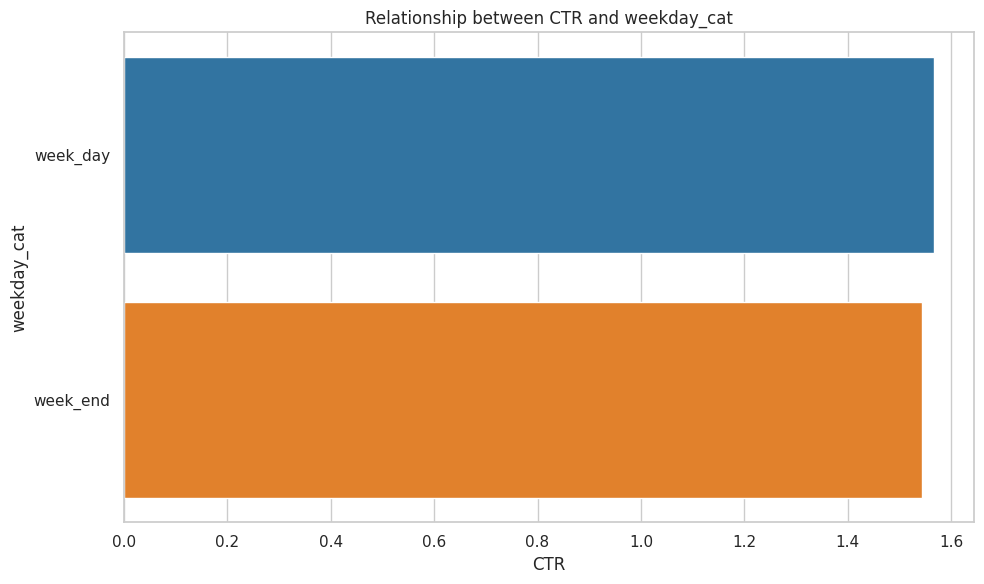

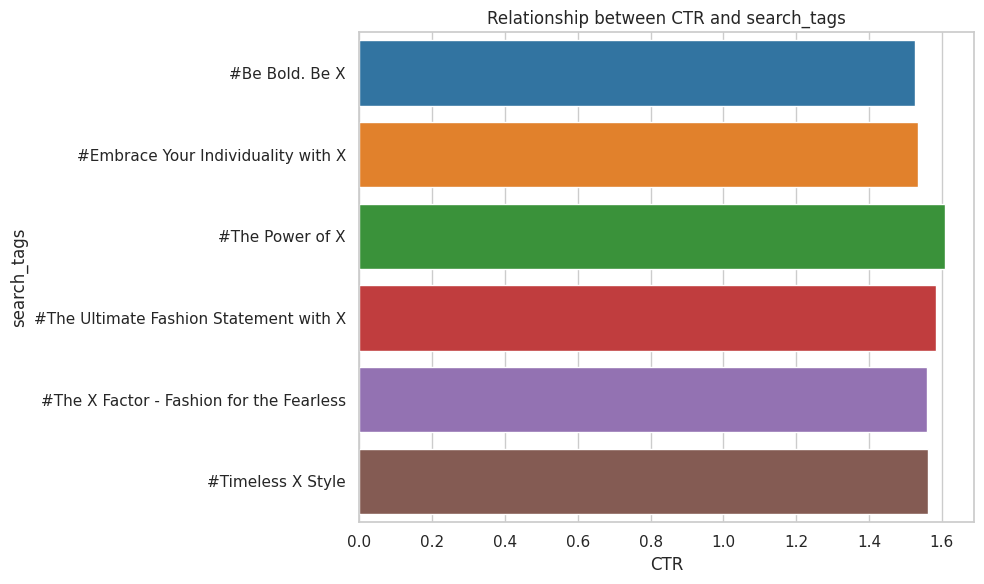

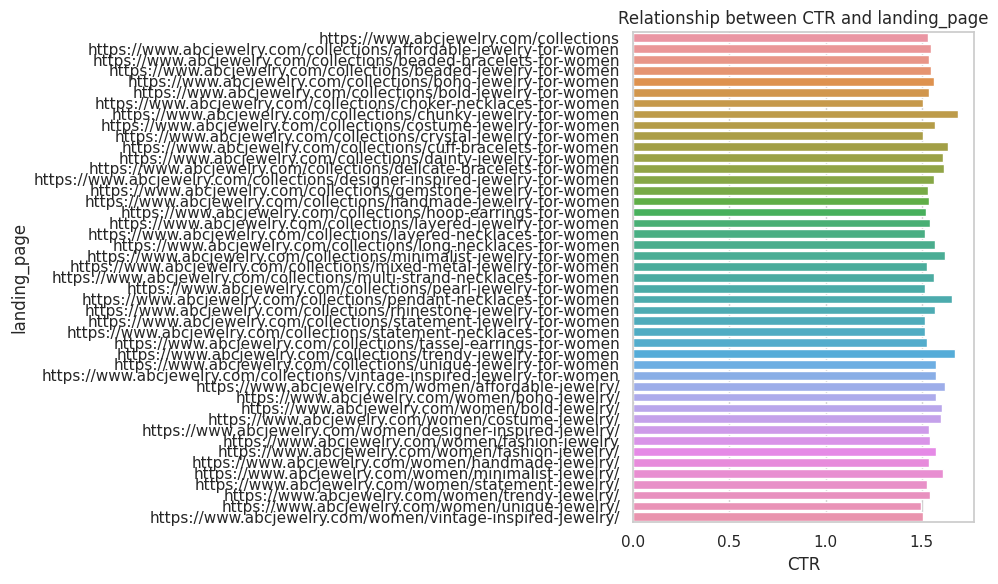

In [ ]:
# Show relationship of some categorical variables and ctr
categorical_vars = ['ext_service_name', 'channel_name', 'stats_currency', 'timezone', 'weekday_cat', 'search_tags', 'landing_page']

# Loop through each categorical variable and create a bar plot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.barplot(x='ctr', y=var, data=mc3, orient='horizontal', errorbar=None)
    plt.title(f'Relationship between CTR and {var}')
    plt.xlabel('CTR')
    plt.ylabel(var)
    plt.tight_layout()  # Ensure plots don't overlap
    # plt.show()
    # Save the plot as an image file (e.g., PNG)
    # plt.savefig(f'CTR_{var}.png', bbox_inches='tight')
    # Download the saved image to your local drive
    # files.download(f'CTR_{var}.png')

In [ ]:
# Group by 'ext_service_name' and calculate the mean of 'ctr'
currency_ctr_mean = mc3.groupby('cmi_currency_code')['ctr'].mean().reset_index().sort_values(by='ctr', ascending=False)

# Rename the columns for clarity
currency_ctr_mean.columns = ['cmi_currency_code', 'mean_ctr']

# Display the resulting DataFrame
print(currency_ctr_mean)


  cmi_currency_code  mean_ctr
2               INR  3.890617
1               EGP  2.283216
3               SGD  1.497644
4               USD  1.369665
0               AED  1.264222


In [ ]:
# Create a DataFrame with unique ext_service_id and ext_service_name combinations
ext_service_mapping = mc3[['ext_service_id', 'ext_service_name']].drop_duplicates()

# Display the DataFrame
print(ext_service_mapping)

   ext_service_id ext_service_name
0             128     Facebook Ads
1              16            DV360
4               4       Google Ads


In [ ]:
# view the top 10 platforms (ext_service_name) by ctr
ext_service_ctr = mc3[['ext_service_name', 'ctr']].drop_duplicates().sort_values(by='ctr', ascending=False).head(10)
print(ext_service_ctr)

      ext_service_name         ctr
16255     Facebook Ads  265.611691
16254            DV360  236.477935
16256     Facebook Ads  184.370814
16253       Google Ads  107.507804
16252            DV360   94.102990
16168     Facebook Ads   88.551947
16222     Facebook Ads   87.651332
21630     Facebook Ads   85.479720
16160            DV360   84.729818
21603       Google Ads   81.964063


In [ ]:
# Group by 'ext_service_name' and calculate the mean of 'ctr'
service_ctr_mean = mc3.groupby('ext_service_name')['ctr'].mean().reset_index().sort_values(by='ctr', ascending=False)

# Rename the columns for clarity
service_ctr_mean.columns = ['ext_service_name', 'mean_ctr']

# Display the resulting DataFrame
print(service_ctr_mean)

  ext_service_name  mean_ctr
1     Facebook Ads  1.576939
0            DV360  1.569929
2       Google Ads  1.540906


In [ ]:
# Group by 'ext_service_name' and calculate the mean of 'ctr'
timezone_ctr_mean = mc3.groupby('timezone')['ctr'].mean().reset_index().sort_values(by='ctr', ascending=False)

# Rename the columns for clarity
timezone_ctr_mean.columns = ['timezone', 'mean_ctr']

# Display the resulting DataFrame
print(timezone_ctr_mean)

           timezone  mean_ctr
0      Africa/Cairo  2.283216
2     Asia/Calcutta  2.276134
6        US/Eastern  2.148828
3      Asia/Kolkata  1.580481
5    Asia/Singapore  1.497644
1  America/New_York  1.381377
4       Asia/Muscat  1.153891


In [ ]:
# Group by 'ext_service_name' and calculate the mean of 'ctr'
channel_ctr_mean = mc3.groupby('channel_name')['ctr'].mean().reset_index().sort_values(by='ctr', ascending=False)

# Rename the columns for clarity
channel_ctr_mean.columns = ['channel_name', 'mean_ctr']

# Display the resulting DataFrame
print(channel_ctr_mean)

  channel_name  mean_ctr
1       Mobile  1.578299
4        Video  1.575073
0      Display  1.573943
2       Search  1.559747
3       Social  1.526041


In [ ]:
# Group by 'search_tags' and calculate the mean of 'ctr'
search_tags_ctr_mean = mc3.groupby('search_tags')['ctr'].mean().reset_index().sort_values(by='ctr', ascending=False)

# Rename the columns for clarity
search_tags_ctr_mean.columns = ['search_tags', 'mean_ctr']

# Display the resulting DataFrame
print(search_tags_ctr_mean)

                                search_tags  mean_ctr
2                           #The Power of X  1.607822
3    #The Ultimate Fashion Statement with X  1.584383
5                         #Timeless X Style  1.562287
4  #The X Factor - Fashion for the Fearless  1.559263
1        #Embrace Your Individuality with X  1.535216
0                            #Be Bold. Be X  1.526673


In [ ]:
# Create a DataFrame with unique advertiser_id and advertiser_name combinations
advertiser_mapping = mc3[['advertiser_id', 'advertiser_name']].drop_duplicates()

# Display the DataFrame
print(advertiser_mapping)

       advertiser_id advertiser_name
0               4756             Web
5               5191           Brand
3586            5209           Brand
7126            5395           Luxor
7430            5227      Almaza Bay
7601            5611             USA
7646            5785             USA
7816            5641       Karnataka
7830            5686     Maharashtra
7843            6382            Oman
13636           6391             UAE
15286           5857           Cairo
15672           5914       Al Ahmadi
15782           5908     Addis Ababa
15910           5917        Vadodara
16103           5938         Chennai
16105           6112      Coimbatore
16198           5755           Malad
16262           6019          Indore
16483           6340            Pali
16487           6292  Andhra Pradesh
17185           6337    Kuala Lumpur
18037           6298         Gujarat
18602           6325        Chandpur
18647           6316     West Bengal
19424           6331      Tamil Nadu
1

In [ ]:
top_10_advertiser = mc2[["advertiser_name", "ctr"]].drop_duplicates().sort_values(by="ctr", ascending=False).head(10)
print(top_10_advertiser)

      advertiser_name         ctr
16255           Malad  265.611691
16254           Malad  236.477935
16256           Malad  184.370814
16253           Malad  107.507804
16252           Malad   94.102990
16168      Coimbatore   88.551947
16222           Malad   87.651332
21630     Maharashtra   85.479720
16160      Coimbatore   84.729818
21603     Maharashtra   81.964063


In [ ]:
# Group by 'advertiser_name' and calculate the mean of 'ctr'
advertiser_ctr_mean = mc3.groupby('advertiser_name')['ctr'].mean().reset_index()

# Rename the columns for clarity
advertiser_ctr_mean.columns = ['advertiser_name', 'mean_ctr']

# Create new DataFrame of the top 10 advertiser names and display
top_10_advertiser_names = advertiser_ctr_mean.sort_values(by='mean_ctr', ascending=False).reset_index().head(10)
print(top_10_advertiser_names)

   index advertiser_name   mean_ctr
0     21           Malad  24.718518
1     10      Coimbatore  12.222923
2      0     Addis Ababa   5.936385
3     27            Pali   5.698998
4     15       Karnataka   5.223533
5     11         Gujarat   4.228532
6     36        Vadodara   4.128323
7     26          Orissa   3.978124
8     24           North   3.724469
9      9         Chennai   3.560229


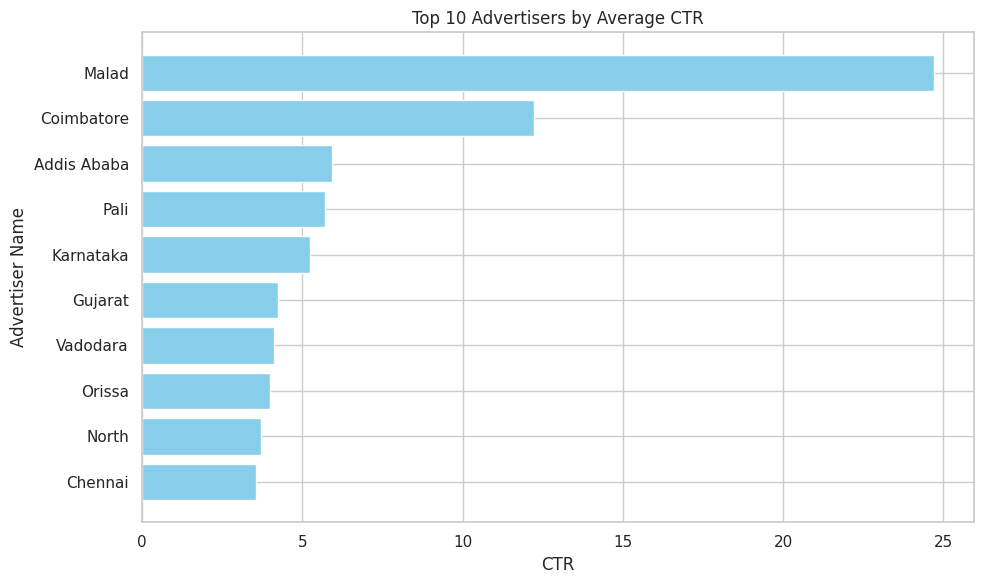

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_advertiser_names['advertiser_name'], top_10_advertiser_names['mean_ctr'], color='skyblue')
plt.xlabel('CTR')
plt.ylabel('Advertiser Name')
plt.title('Top 10 Advertisers by Average CTR')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest CTR at the top
plt.tight_layout()
# plt.show()
# Save the plot as an image file (e.g., PNG)
# plt.savefig('top_10_advertisers.png', bbox_inches='tight')
# Download the saved image to your local drive
# files.download('top_10_advertisers.png')

In [ ]:
# number of unique values of keywords
mc2["landing_page"].nunique()

45

In [ ]:
# Group by 'landing_page' and calculate the mean of 'ctr'
landing_page_ctr_mean = mc3.groupby('landing_page')['ctr'].mean().reset_index()

# Rename the columns for clarity
landing_page_ctr_mean.columns = ['landing_page', 'mean_ctr']

# Create new DataFrame of the top 10 advertiser names and display
top_10_landing_page = landing_page_ctr_mean.sort_values(by='mean_ctr', ascending=False).reset_index().head(10)
print(top_10_landing_page)

   index                                       landing_page  mean_ctr
0      7  https://www.abcjewelry.com/collections/chunky-...  1.687391
1     29  https://www.abcjewelry.com/collections/trendy-...  1.672263
2     24  https://www.abcjewelry.com/collections/pendant...  1.655011
3     10  https://www.abcjewelry.com/collections/cuff-br...  1.637021
4     32  https://www.abcjewelry.com/women/affordable-je...  1.623397
5     20  https://www.abcjewelry.com/collections/minimal...  1.618565
6     12  https://www.abcjewelry.com/collections/delicat...  1.616463
7     40  https://www.abcjewelry.com/women/minimalist-je...  1.613057
8     11  https://www.abcjewelry.com/collections/dainty-...  1.611701
9     34     https://www.abcjewelry.com/women/bold-jewelry/  1.603242


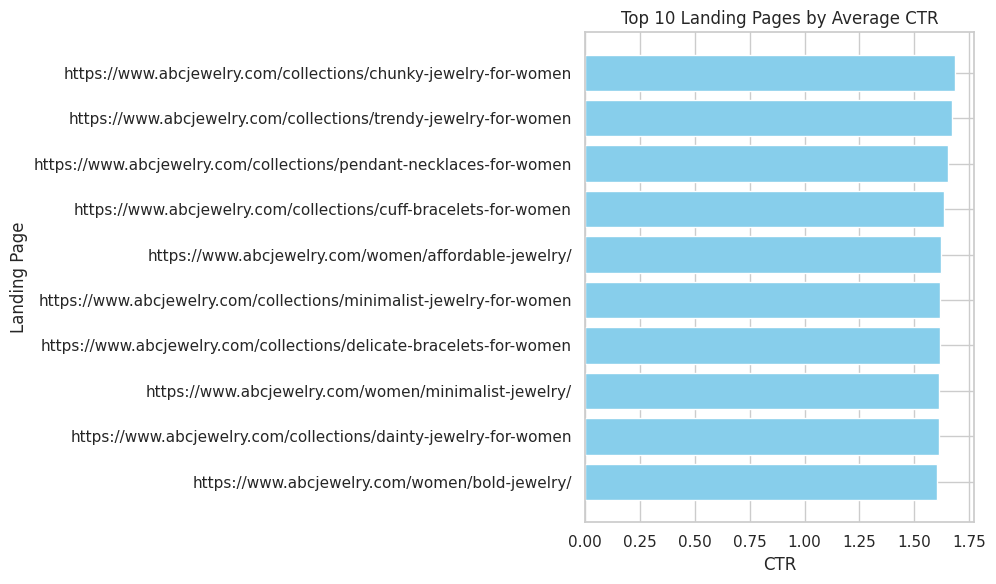

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_landing_page['landing_page'], top_10_landing_page['mean_ctr'], color='skyblue')
plt.xlabel('CTR')
plt.ylabel('Landing Page')
plt.title('Top 10 Landing Pages by Average CTR')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest CTR at the top
plt.tight_layout()
# plt.show()
# Save the plot as an image file (e.g., PNG)
# plt.savefig('top_10_landing_pages.png', bbox_inches='tight')
# Download the saved image to your local drive
# files.download('top_10_landing_pages.png')

In [ ]:
# number of unique values of keywords
mc2["keywords"].nunique()

118

In [ ]:
top_10_keywords = mc2[["keywords", "ctr"]].drop_duplicates().sort_values(by="ctr", ascending=False).head(10)
print(top_10_keywords)

                        keywords         ctr
16255               fall jewelry  265.611691
16254             animal jewelry  236.477935
16256               body jewelry  184.370814
16253            artisan jewelry  107.507804
16252              retro jewelry   94.102990
16168                    bangles   88.551947
16222             formal jewelry   87.651332
21630        statement necklaces   85.479720
16160  affordable trendy jewelry   84.729818
21603          edwardian jewelry   81.964063


In [ ]:
# Group by 'keywords' and calculate the mean of 'ctr'
keywords_ctr_mean = mc3.groupby('keywords')['ctr'].mean().reset_index()

# Rename the columns for clarity
keywords_ctr_mean.columns = ['keywords', 'mean_ctr']

# Create new DataFrame of the top 10 advertiser names and display
top_10_keywords = keywords_ctr_mean.sort_values(by='mean_ctr', ascending=False).head(10)
print(top_10_keywords)

                     keywords  mean_ctr
52               fall jewelry  2.094649
4              animal jewelry  1.898021
18               body jewelry  1.855341
56           festival jewelry  1.730247
9             artisan jewelry  1.717770
12            baroque jewelry  1.713911
97        statement necklaces  1.706498
32           clip-on earrings  1.687166
3   affordable trendy jewelry  1.687119
11                    bangles  1.682542


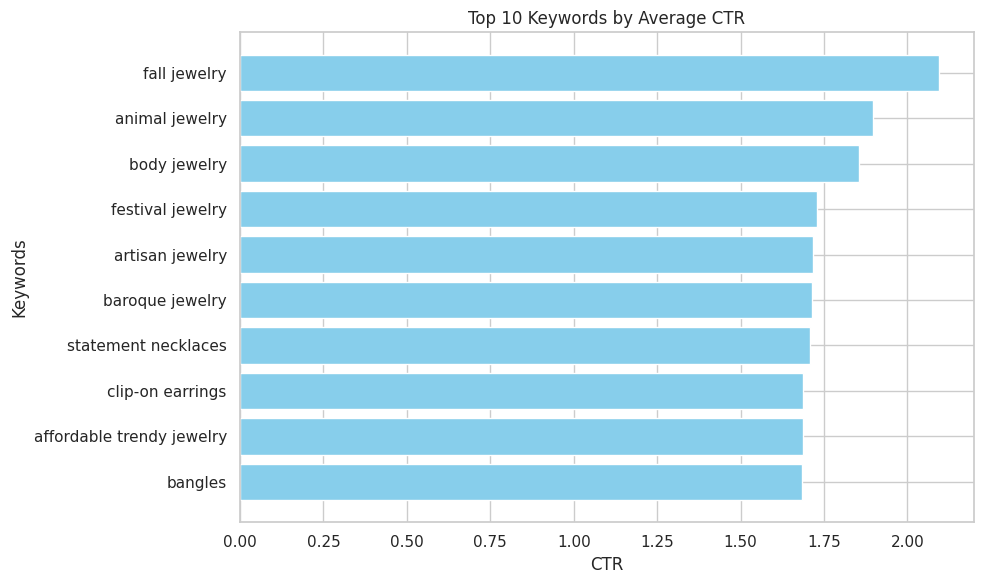

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_keywords['keywords'], top_10_keywords['mean_ctr'], color='skyblue')
plt.xlabel('CTR')
plt.ylabel('Keywords')
plt.title('Top 10 Keywords by Average CTR')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest CTR at the top
plt.tight_layout()
# plt.show()
# Save the plot as an image file (e.g., PNG)
# plt.savefig('top_10_keywords.png', bbox_inches='tight')
# Download the saved image to your local drive
# files.download('top_10_keywords.png')

# Data preparation

In [ ]:
mc3.head(2)

campaign_item_id  no_of_days       time  ext_service_id ext_service_name  \
0              2733           7 2022-05-01             128     Facebook Ads   
1              2733           8 2022-05-02              16            DV360   

   creative_id  creative_width  creative_height      search_tags  template_id  \
0         1000           300.0            250.0  #The Power of X         90.0   
1         1000           300.0            250.0   #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/           4756   

  advertiser_name  network_id  approved_budget advertiser_currency  \
0             Web         190            400.0                 SGD   
1             Web         190            400.0                 SGD   

   channel_id channel_name  network_margin  campaign_budget_usd  impressions  \
0          32       Mobile             0.0           652.173913          837   
1           8       Social             0.0           652.173913         2634   

   clicks stats_currency currency_code  exchange_rate  media_cost_usd  \
0       8            SGD           SGD              1       14.058514   
1      44            SGD           SGD              1       99.633496   

  search_tag_cat cmi_currency_code        timezone weekday_cat  \
0         Others               SGD  Asia/Singapore    week_end   
1         Others               SGD  Asia/Singapore    week_day   

             keywords       ctr  
0  delicate bracelets  0.955795  
1      summer jewelry  1.670463

In [ ]:
# Extract year, month, and day from the 'time' column
mc3['year'] = mc3['time'].dt.year
mc3['month'] = mc3['time'].dt.month
mc3['day'] = mc3['time'].dt.day

# Drop the original 'time' column and other redundant columns
mc3.drop(columns=['time', 'campaign_item_id', 'ext_service_id', 'creative_id',
                  'creative_width',	'creative_height',	'template_id',
                  'advertiser_id',	'network_id', 'channel_id', 'network_margin',
                  'advertiser_currency', 'stats_currency', 'currency_code'], inplace=True)

# Perform one-hot encoding for categorical variables
categorical_columns = ['ext_service_name', 'search_tags', 'landing_page',
                       'channel_name', 'advertiser_name', 'search_tag_cat',
                       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords']

# Now, mc3_encoded contains the extracted time features and one-hot encoded categorical variables
mc3_encoded = pd.get_dummies(mc3, columns=categorical_columns, drop_first=True)

# preview mc3_encoded
mc3_encoded.head(2)

no_of_days  approved_budget  campaign_budget_usd  impressions  clicks  \
0           7            400.0           652.173913          837       8   
1           8            400.0           652.173913         2634      44   

   exchange_rate  media_cost_usd       ctr  year  month  day  \
0              1       14.058514  0.955795  2022      5    1   
1              1       99.633496  1.670463  2022      5    2   

   ext_service_name_Facebook Ads  ext_service_name_Google Ads  \
0                              1                            0   
1                              0                            0   

   search_tags_#Embrace Your Individuality with X  \
0                                               0   
1                                               0   

   search_tags_#The Power of X  \
0                            1   
1                            0   

   search_tags_#The Ultimate Fashion Statement with X  \
0                                                  0    
1                                                  0    

   search_tags_#The X Factor - Fashion for the Fearless  \
0                                                  0      
1                                                  0      

   search_tags_#Timeless X Style  \
0                              0   
1                              0   

   landing_page_https://www.abcjewelry.com/collections/affordable-jewelry-for-women  \
0                                                  0                                  
1                                                  0                                  

   landing_page_https://www.abcjewelry.com/collections/beaded-bracelets-for-women  \
0                                                  0                                
1                                                  0                                

   landing_page_https://www.abcjewelry.com/collections/beaded-jewelry-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/boho-jewelry-for-women  \
0                                                  1                            
1                                                  0                            

   landing_page_https://www.abcjewelry.com/collections/bold-jewelry-for-women  \
0                                                  0                            
1                                                  0                            

   landing_page_https://www.abcjewelry.com/collections/choker-necklaces-for-women  \
0                                                  0                                
1                                                  0                                

   landing_page_https://www.abcjewelry.com/collections/chunky-jewelry-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/costume-jewelry-for-women  \
0                                                  0                               
1                                                  0                               

   landing_page_https://www.abcjewelry.com/collections/crystal-jewelry-for-women  \
0                                                  0                               
1                                                  0                               

   landing_page_https://www.abcjewelry.com/collections/cuff-bracelets-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/dainty-jewelry-for-women  \
0                                                  0          

In [ ]:
mc3_encoded.columns

Index(['no_of_days', 'approved_budget', 'campaign_budget_usd', 'impressions',
       'clicks', 'exchange_rate', 'media_cost_usd', 'ctr', 'year', 'month',
       ...
       'keywords_unique and trendy jewelry', 'keywords_unique jewelry',
       'keywords_vibrant jewelry', 'keywords_victorian jewelry',
       'keywords_vintage jewelry', 'keywords_vintage-inspired jewelry',
       'keywords_wedding jewelry', 'keywords_whimsical jewelry',
       'keywords_winter jewelry', 'keywords_zodiac jewelry'],
      dtype='object', length=236)

In [ ]:
mc3_encoded.shape

(68880, 236)

# Building Models

## Models for MC3_encoded DataFarame

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create function to test models on DataFrames

def evaluate_regression_model(dataframe, target_column, model, test_size=0.3, random_state=42):
    # Split the data into features (X) and target (y)
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = sqrt(mse)  # Calculate RMSE

    # Calculate R-squared (R²)
    r_squared = r2_score(y_test, predictions)

    return mse, mae, rmse, r_squared;


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Test model performance on mc3_encoded DataFrame

# Linear Regression
linear_model_1 = LinearRegression()
linear_mse, linear_mae, linear_rmse, linear_r_squared = evaluate_regression_model(mc3_encoded, 'ctr', linear_model_1)
print(f"mc3:Linear Regression - MSE: {linear_mse: .3f}, MAE: {linear_mae: .3f}, RMSE: {linear_rmse: .3f}  R²: {linear_r_squared: .3f}")

# Decision Tree Regression
decision_tree_model_1 = DecisionTreeRegressor(random_state=42)
dt_mse, dt_mae, dt_rmse, dt_r_squared = evaluate_regression_model(mc3_encoded, 'ctr', decision_tree_model_1)
print(f"mc3:Decision Tree Regression - MSE: {dt_mse: .3f}, MAE: {dt_mae: .3f}, RMSE: {dt_rmse: .3f}, R²: {dt_r_squared: .3f}")

# Random Forest Regression
random_forest_model_1 = RandomForestRegressor(random_state=42)
rf_mse, rf_mae, rf_rmse, rf_r_squared = evaluate_regression_model(mc3_encoded, 'ctr', random_forest_model_1)
print(f"mc3:Random Forest Regression - MSE: {rf_mse: .3f}, MAE: {rf_mae: .3f}, RMSE: {rf_rmse: .3f}, R²: {rf_r_squared: .3f}")

# XGBoost Regression
xgboost_model_1 = xgb.XGBRegressor(random_state=42)
xgboost_mse, xgboost_mae, xgboost_rmse, xgboost_r_squared = evaluate_regression_model(mc3_encoded, 'ctr', xgboost_model_1)
print(f"mc3:XGBoost Regression - MSE: {xgboost_mse: .3f}, MAE: {xgboost_mae: .3f}, RMSE: {xgboost_rmse: .3f} R²: {xgboost_r_squared: .3f}")


mc3:Linear Regression - MSE:  1.271, MAE:  0.489, RMSE:  1.128  R²:  0.799
mc3:Decision Tree Regression - MSE:  1.173, MAE:  0.044, RMSE:  1.083, R²:  0.815
mc3:Random Forest Regression - MSE:  0.771, MAE:  0.025, RMSE:  0.878, R²:  0.878
mc3:XGBoost Regression - MSE:  0.645, MAE:  0.054, RMSE:  0.803 R²:  0.898


## Feature Selection by Models for MC3_encoded DataFrame

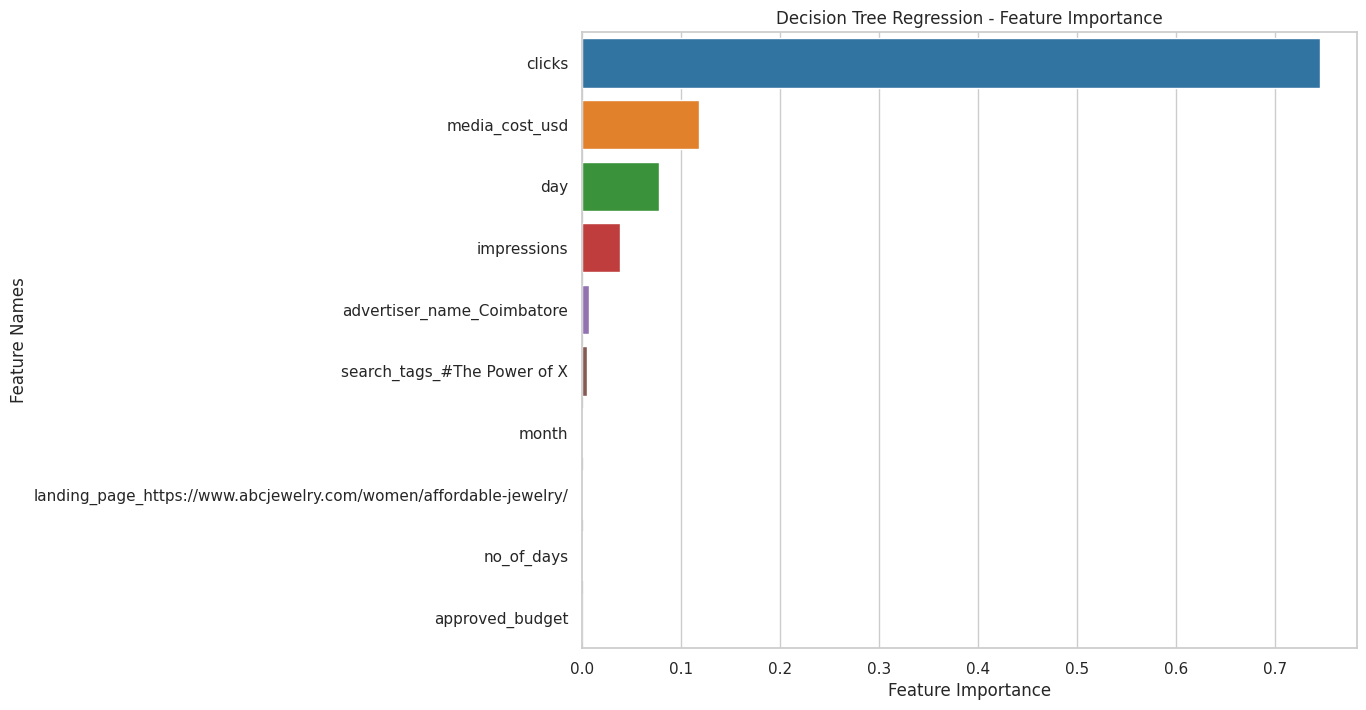

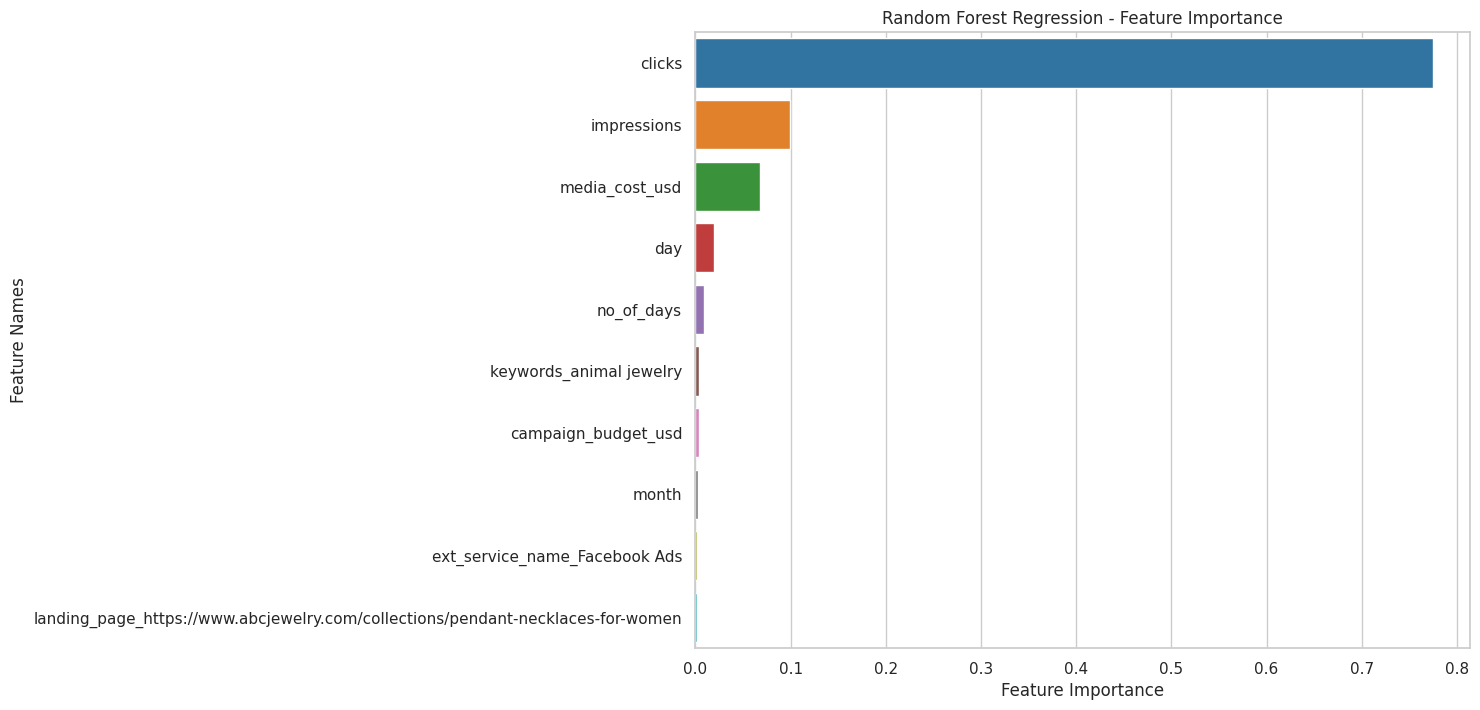

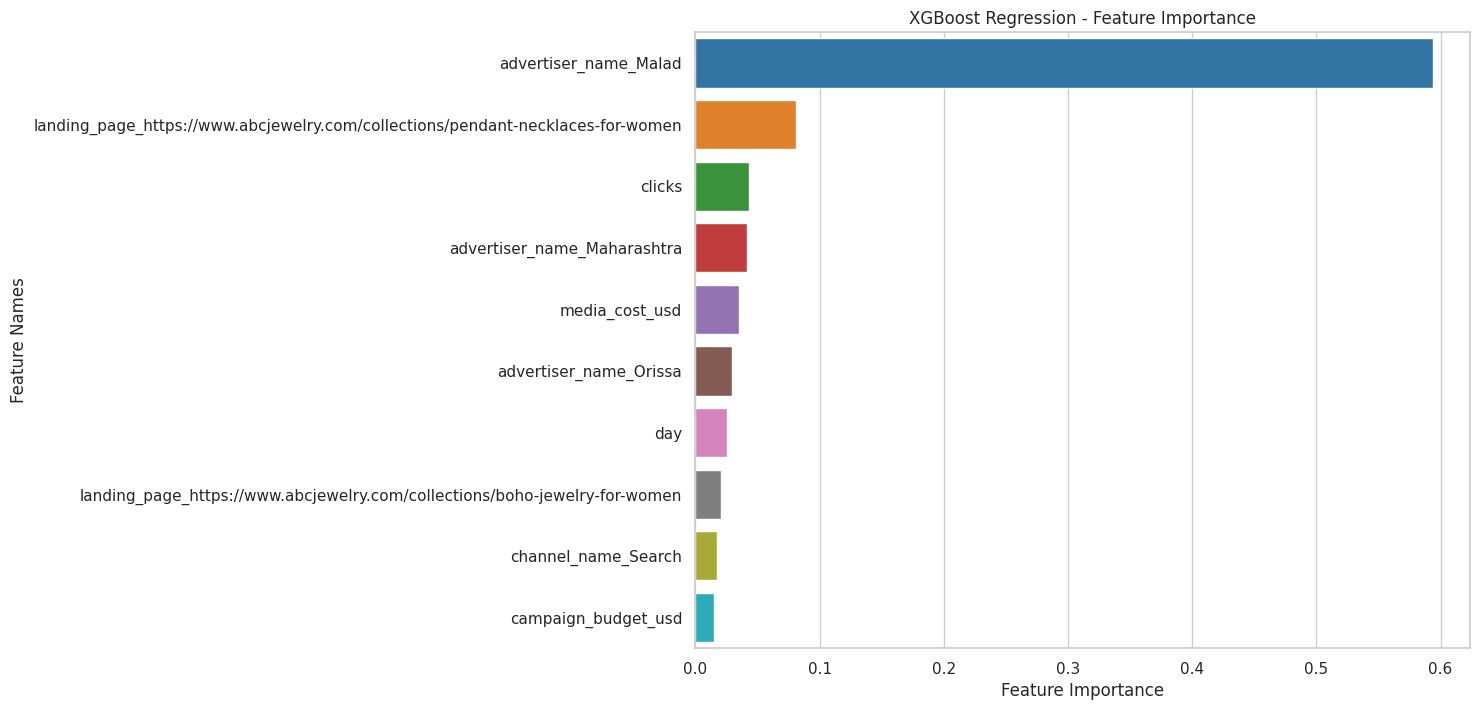

In [ ]:
# Define a function to plot feature importances
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# Get feature importances for each model
# linear_feature_importance = np.abs(linear_model.coef_)
decision_tree_feature_importance_1 = decision_tree_model_1.feature_importances_
random_forest_feature_importance_1 = random_forest_model_1.feature_importances_
xgboost_feature_importance_1 = xgboost_model_1.feature_importances_

# Split the data into training and testing sets
X_mc3 = mc3_encoded.drop(columns=['ctr'])
y_mc3 = mc3_encoded['ctr']

# Get feature names
feature_names = X_mc3.columns

# Plot feature importances for each model
# plot_feature_importance(linear_feature_importance, feature_names, 'Linear Regression')
plot_feature_importance(decision_tree_feature_importance_1, feature_names, 'Decision Tree Regression')
# Save the plot as an image file (e.g., PNG)
# plt.savefig('mc3_DT_fi', bbox_inches='tight')
# Download the saved image to your local drive
# files.download('mc3_DT_fi.png')
plot_feature_importance(random_forest_feature_importance_1, feature_names, 'Random Forest Regression')
# plt.savefig('mc3_RF_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc3_RF_fi.png') # Download the saved image to your local drive
plot_feature_importance(xgboost_feature_importance_1, feature_names, 'XGBoost Regression')
# plt.savefig('mc3_XGB_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc3_XGB_fi.png') # Download the saved image to your local drive

plt.show()

In [ ]:
mc3_encoded.shape

(68880, 236)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features based on F-statistic
k = 10  # Choosing to keep 10 features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_mc3, y_mc3)


In [ ]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names from the original DataFrame
selected_feature_names = X_mc3.columns[selected_feature_indices]

# Create a DataFrame with feature names and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selector.scores_[selected_feature_indices]})
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

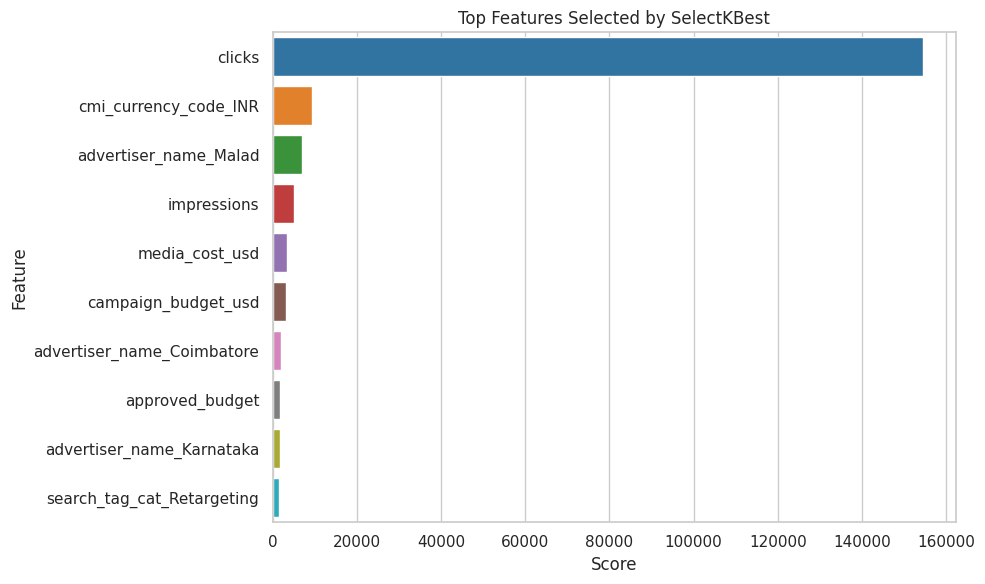

In [ ]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=selected_features_df)
plt.title('Top Features Selected by SelectKBest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
# plt.savefig('mc3_SelectKBest_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc3_SelectKBest_fi.png') # Download the saved image to your local drive

# Handling Outliers

In [ ]:
# preview mc3_encoded
mc3.head(2)

no_of_days ext_service_name      search_tags  \
0           7     Facebook Ads  #The Power of X   
1           8            DV360   #Be Bold. Be X   

                                        landing_page advertiser_name  \
0  https://www.abcjewelry.com/collections/boho-je...             Web   
1  https://www.abcjewelry.com/women/costume-jewelry/             Web   

   approved_budget channel_name  campaign_budget_usd  impressions  clicks  \
0            400.0       Mobile           652.173913          837       8   
1            400.0       Social           652.173913         2634      44   

   exchange_rate  media_cost_usd search_tag_cat cmi_currency_code  \
0              1       14.058514         Others               SGD   
1              1       99.633496         Others               SGD   

         timezone weekday_cat            keywords       ctr  year  month  day  
0  Asia/Singapore    week_end  delicate bracelets  0.955795  2022      5    1  
1  Asia/Singapore    week_day      summer jewelry  1.670463  2022      5    2

In [ ]:
mc3.describe()

no_of_days  approved_budget  campaign_budget_usd    impressions  \
count  68880.000000     6.888000e+04         68880.000000   68880.000000   
mean      27.910235     9.770069e+04           532.476686    1127.699158   
std       25.786337     5.050085e+05           591.363295    2569.948322   
min        0.000000     4.000000e+02             2.452316     511.000000   
25%        9.000000     6.000000e+03           196.185286     524.000000   
50%       20.000000     1.000000e+04           367.847411     568.000000   
75%       38.000000     1.500000e+04           700.272480     743.000000   
max      118.000000     6.000000e+06         12265.423770  153959.000000   

             clicks  exchange_rate  media_cost_usd           ctr     year  \
count  68880.000000        68880.0    68880.000000  68880.000000  68880.0   
mean      33.171603            1.0        8.826412      1.562607   2022.0   
std      268.247119            0.0       28.029980      2.323680      0.0   
min        2.000000            1.0        0.000000      0.088731   2022.0   
25%        5.000000            1.0        0.406993      0.917431   2022.0   
50%        8.000000            1.0        1.495146      1.353965   2022.0   
75%       11.000000            1.0        6.461064      1.788909   2022.0   
max    31807.000000            1.0     2295.028945    265.611691   2022.0   

              month           day  
count  68880.000000  68880.000000  
mean       9.403717     15.954021  
std        1.695498      8.846233  
min        5.000000      1.000000  
25%        8.000000      8.000000  
50%       10.000000     16.000000  
75%       11.000000     24.000000  
max       12.000000     31.000000

In [ ]:
print(mc3.shape)

(68880, 21)


## Outliers handled by +/- 4 STD to create MC4

In [ ]:
# Using Standard deviation
# Calculate standard deviation
std_approved_budget = mc3['approved_budget'].std()

# defining limits
max_limit = mc3.approved_budget.mean() + 4*std_approved_budget
min_limit = mc3.approved_budget.mean() - 4*std_approved_budget

# to remove outliers
mc4 = mc3[(mc3.approved_budget > min_limit) & (mc3.approved_budget < max_limit)]
print(f'The max_limit is {max_limit} and the min_limit is {min_limit}')
print('The mc4 shape is', mc4.shape)

The max_limit is 2117734.7713717367 and the min_limit is -1922333.393080215
The mc4 shape is (68460, 21)


## Outliers handled by 25% & 75% percentiles to create MC4_B

In [ ]:
# Using percentiles

# Get the percentiles
min_t, max_t = mc3.approved_budget.quantile([0.25, 0.75])
min_t, max_t

# to remove outliers
mc4_b = mc3[(mc3.approved_budget > min_t) & (mc3.approved_budget < max_t)]
mc4_b.shape

print(f'The max_t is {max_t} and the min_t is {min_t}')
print('The mc4_b shape is', mc4_b.shape)

The max_t is 15000.0 and the min_t is 6000.0
The mc4_b shape is (30468, 21)


# Building Models with the new DataFrame versions

In [ ]:
# one-hot encoded categorical variables
mc4_encoded = pd.get_dummies(mc4, columns=categorical_columns, drop_first=True)

# preview mc4_encoded
mc4_encoded.head(2)

no_of_days  approved_budget  campaign_budget_usd  impressions  clicks  \
0           7            400.0           652.173913          837       8   
1           8            400.0           652.173913         2634      44   

   exchange_rate  media_cost_usd       ctr  year  month  day  \
0              1       14.058514  0.955795  2022      5    1   
1              1       99.633496  1.670463  2022      5    2   

   ext_service_name_Facebook Ads  ext_service_name_Google Ads  \
0                              1                            0   
1                              0                            0   

   search_tags_#Embrace Your Individuality with X  \
0                                               0   
1                                               0   

   search_tags_#The Power of X  \
0                            1   
1                            0   

   search_tags_#The Ultimate Fashion Statement with X  \
0                                                  0    
1                                                  0    

   search_tags_#The X Factor - Fashion for the Fearless  \
0                                                  0      
1                                                  0      

   search_tags_#Timeless X Style  \
0                              0   
1                              0   

   landing_page_https://www.abcjewelry.com/collections/affordable-jewelry-for-women  \
0                                                  0                                  
1                                                  0                                  

   landing_page_https://www.abcjewelry.com/collections/beaded-bracelets-for-women  \
0                                                  0                                
1                                                  0                                

   landing_page_https://www.abcjewelry.com/collections/beaded-jewelry-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/boho-jewelry-for-women  \
0                                                  1                            
1                                                  0                            

   landing_page_https://www.abcjewelry.com/collections/bold-jewelry-for-women  \
0                                                  0                            
1                                                  0                            

   landing_page_https://www.abcjewelry.com/collections/choker-necklaces-for-women  \
0                                                  0                                
1                                                  0                                

   landing_page_https://www.abcjewelry.com/collections/chunky-jewelry-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/costume-jewelry-for-women  \
0                                                  0                               
1                                                  0                               

   landing_page_https://www.abcjewelry.com/collections/crystal-jewelry-for-women  \
0                                                  0                               
1                                                  0                               

   landing_page_https://www.abcjewelry.com/collections/cuff-bracelets-for-women  \
0                                                  0                              
1                                                  0                              

   landing_page_https://www.abcjewelry.com/collections/dainty-jewelry-for-women  \
0                                                  0          

In [ ]:
# one-hot encoded categorical variables
mc4_b_encoded = pd.get_dummies(mc4_b, columns=categorical_columns, drop_first=True)

# preview mc4_b_encoded
mc4_b_encoded.head(2)

no_of_days  approved_budget  campaign_budget_usd  impressions  clicks  \
7843           0          10000.0           524.523161          531      10   
7844           1          10000.0           524.523161          559       6   

      exchange_rate  media_cost_usd       ctr  year  month  day  \
7843              1        0.607761  1.883239  2022      9   15   
7844              1        0.981329  1.073345  2022      9   16   

      ext_service_name_Facebook Ads  ext_service_name_Google Ads  \
7843                              0                            1   
7844                              0                            0   

      search_tags_#Embrace Your Individuality with X  \
7843                                               0   
7844                                               1   

      search_tags_#The Power of X  \
7843                            1   
7844                            0   

      search_tags_#The Ultimate Fashion Statement with X  \
7843                                                  0    
7844                                                  0    

      search_tags_#The X Factor - Fashion for the Fearless  \
7843                                                  0      
7844                                                  0      

      search_tags_#Timeless X Style  \
7843                              0   
7844                              0   

      landing_page_https://www.abcjewelry.com/collections/affordable-jewelry-for-women  \
7843                                                  0                                  
7844                                                  0                                  

      landing_page_https://www.abcjewelry.com/collections/beaded-bracelets-for-women  \
7843                                                  0                                
7844                                                  0                                

      landing_page_https://www.abcjewelry.com/collections/beaded-jewelry-for-women  \
7843                                                  0                              
7844                                                  0                              

      landing_page_https://www.abcjewelry.com/collections/boho-jewelry-for-women  \
7843                                                  0                            
7844                                                  0                            

      landing_page_https://www.abcjewelry.com/collections/bold-jewelry-for-women  \
7843                                                  0                            
7844                                                  0                            

      landing_page_https://www.abcjewelry.com/collections/choker-necklaces-for-women  \
7843                                                  0                                
7844                                                  0                                

      landing_page_https://www.abcjewelry.com/collections/chunky-jewelry-for-women  \
7843                                                  0                              
7844                                                  0                              

      landing_page_https://www.abcjewelry.com/collections/costume-jewelry-for-women  \
7843                                                  0                               
7844                                                  0                               

      landing_page_https://www.abcjewelry.com/collections/crystal-jewelry-for-women  \
7843                                                  0                               
7844                                                  0                               

      landing_page_https://www.abcjewelry.com/collections/cuff-bracelets-for-women  \
7843                                                  0                              
7844                                                  0                  

## Models for MC4_encoded DataFrame

In [ ]:
# Test model performance on mc4_encoded DataFrame

# Linear Regression
linear_model_2 = LinearRegression()
linear_mse, linear_mae, linear_rmse, linear_r_squared = evaluate_regression_model(mc4_encoded, 'ctr', linear_model_2)
print(f"mc4:Linear Regression - MSE: {linear_mse: .3f}, MAE: {linear_mae: .3f}, RMSE: {linear_rmse: .3f}  R²: {linear_r_squared: .3f}")

# Decision Tree Regression
decision_tree_model_2 = DecisionTreeRegressor(random_state=42)
dt_mse, dt_mae, dt_rmse, dt_r_squared = evaluate_regression_model(mc4_encoded, 'ctr', decision_tree_model_2)
print(f"mc4:Decision Tree Regression - MSE: {dt_mse: .3f}, MAE: {dt_mae: .3f}, RMSE: {dt_rmse: .3f}, R²: {dt_r_squared: .3f}")

# Random Forest Regression
random_forest_model_2 = RandomForestRegressor(random_state=42)
rf_mse, rf_mae, rf_rmse, rf_r_squared = evaluate_regression_model(mc4_encoded, 'ctr', random_forest_model_2)
print(f"mc4:Random Forest Regression - MSE: {rf_mse: .3f}, MAE: {rf_mae: .3f}, RMSE: {rf_rmse: .3f}, R²: {rf_r_squared: .3f}")

# XGBoost Regression
xgboost_model_2 = xgb.XGBRegressor(random_state=42)
xgboost_mse, xgboost_mae, xgboost_rmse, xgboost_r_squared = evaluate_regression_model(mc4_encoded, 'ctr', xgboost_model_2)
print(f"mc4:XGBoost Regression - MSE: {xgboost_mse: .3f}, MAE: {xgboost_mae: .3f}, RMSE: {xgboost_rmse: .3f} R²: {xgboost_r_squared: .3f}")


mc4:Linear Regression - MSE:  1.117, MAE:  0.483, RMSE:  1.057  R²:  0.817
mc4:Decision Tree Regression - MSE:  1.269, MAE:  0.042, RMSE:  1.126, R²:  0.792
mc4:Random Forest Regression - MSE:  0.791, MAE:  0.027, RMSE:  0.889, R²:  0.870
mc4:XGBoost Regression - MSE:  0.612, MAE:  0.055, RMSE:  0.782 R²:  0.900


## Features Selection by Models for MC4_encoded DataFrame

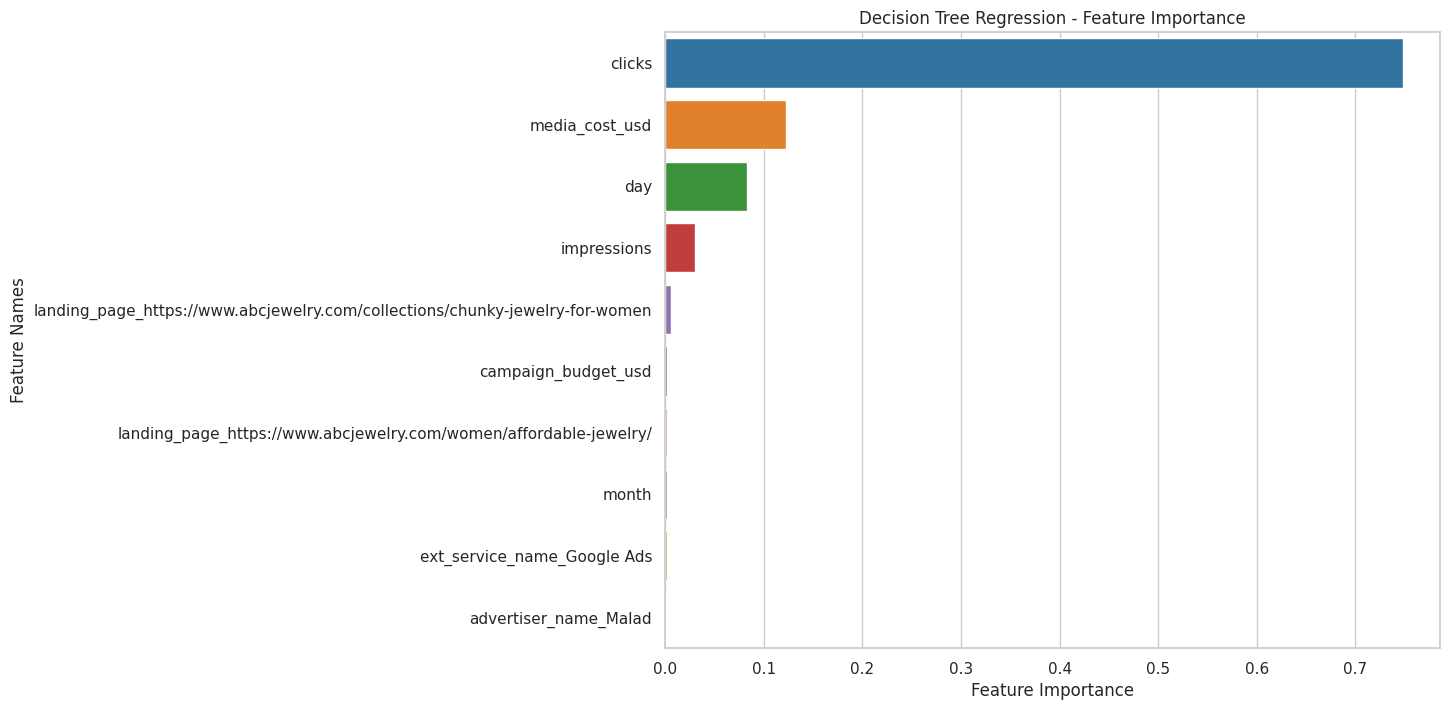

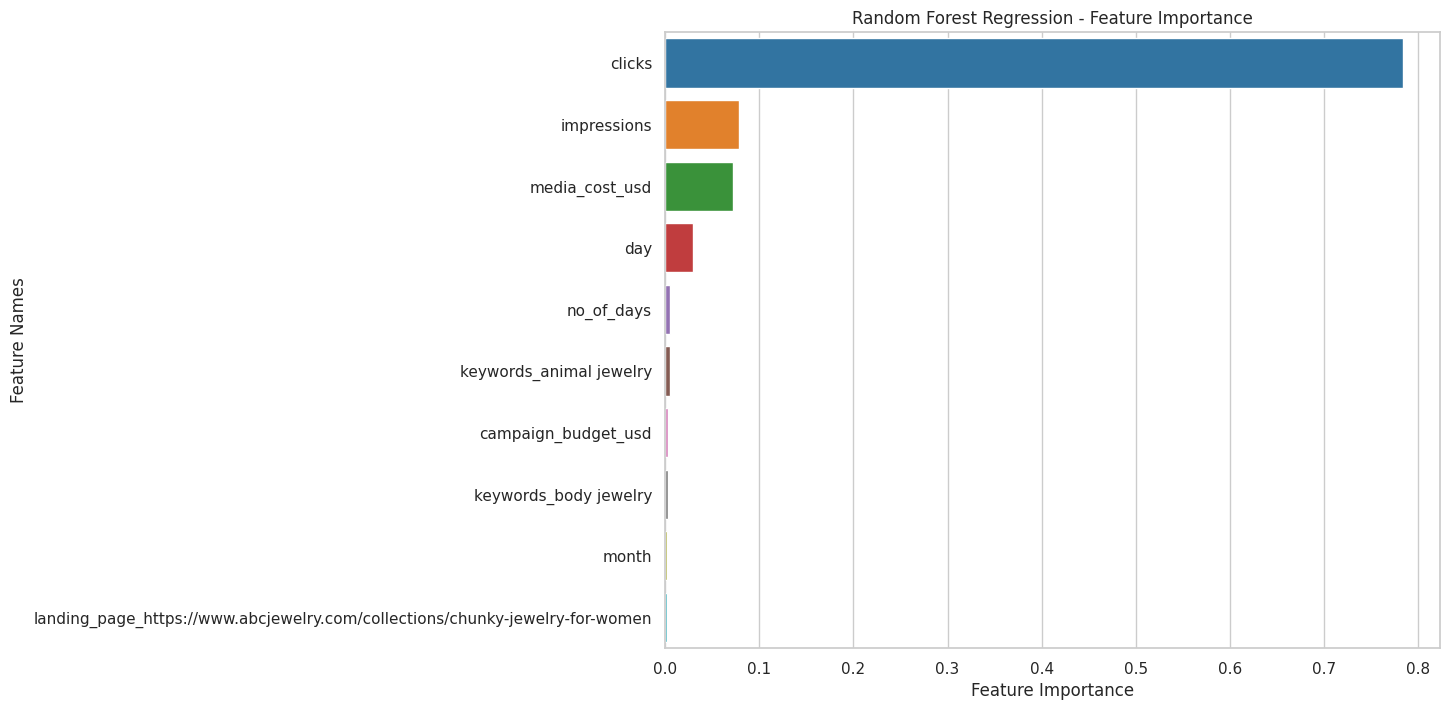

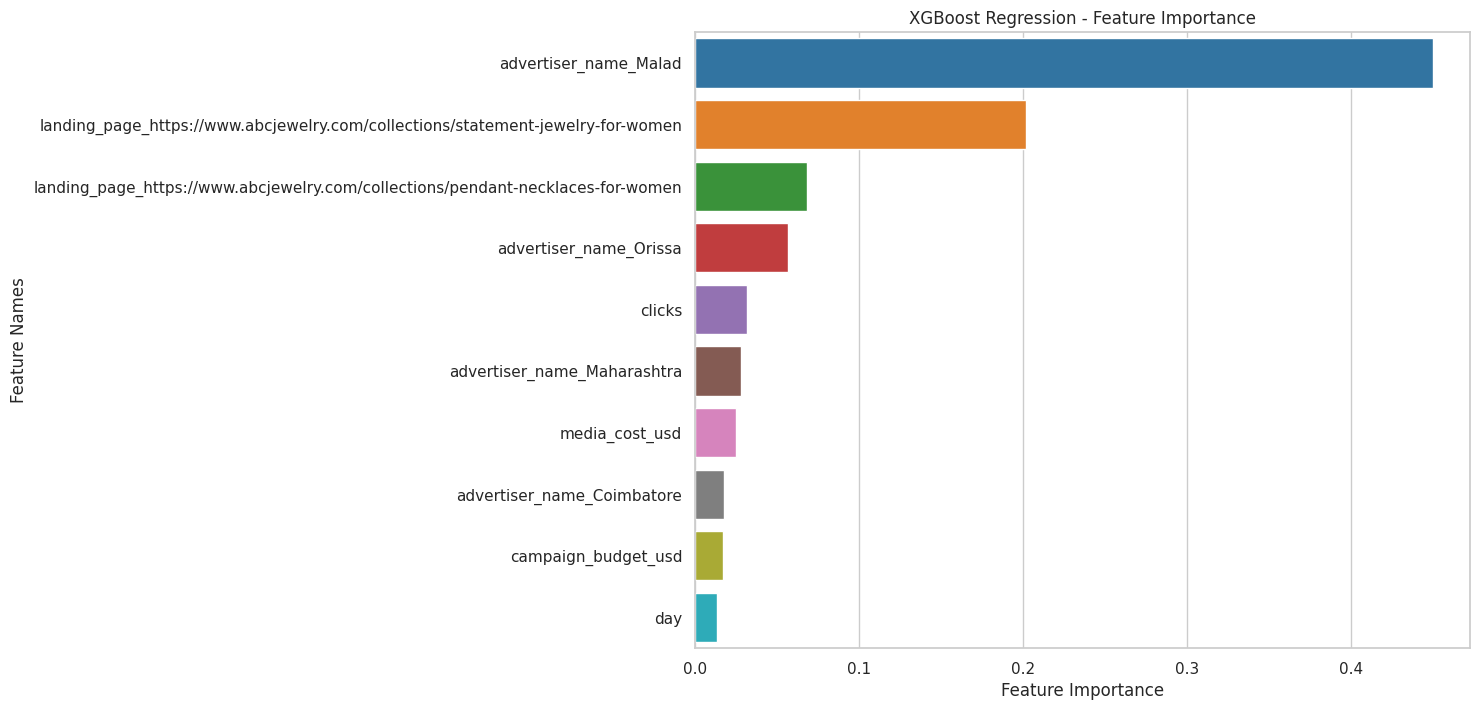

In [ ]:
# Define a function to plot feature importances
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# Get feature importances for each model
# linear_feature_importance = np.abs(linear_model.coef_)
decision_tree_feature_importance_2 = decision_tree_model_2.feature_importances_
random_forest_feature_importance_2 = random_forest_model_2.feature_importances_
xgboost_feature_importance_2 = xgboost_model_2.feature_importances_

# Split the data into training and testing sets
X_mc4 = mc4_encoded.drop(columns=['ctr'])
y_mc4 = mc4_encoded['ctr']

# Define the feature names (assuming you have X defined)
feature_names = X_mc4.columns

# Plot feature importances for each model
# plot_feature_importance(linear_feature_importance, feature_names, 'Linear Regression')
plot_feature_importance(decision_tree_feature_importance_2, feature_names, 'Decision Tree Regression')
# plt.savefig('mc4_DT_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_DT_fi.png') # Download the saved image to your local drive
plot_feature_importance(random_forest_feature_importance_2, feature_names, 'Random Forest Regression')
# plt.savefig('mc4_RF_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_RF_fi.png') # Download the saved image to your local drive
plot_feature_importance(xgboost_feature_importance_2, feature_names, 'XGBoost Regression')
# plt.savefig('mc4_XGB_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_XGB_fi.png') # Download the saved image to your local drive

plt.show()

In [ ]:
mc4_encoded.shape

(68460, 236)

## Models for MC4_b_encoded DataFrame

In [ ]:

# Test model performance on mc4_b_encoded DataFrame
# Linear Regression
linear_model_3 = LinearRegression()
linear_mse, linear_mae, linear_rmse, linear_r_squared = evaluate_regression_model(mc4_b_encoded, 'ctr', linear_model_3)
print(f"mc4_b:Linear Regression - MSE: {linear_mse: .3f}, MAE: {linear_mae: .3f}, RMSE: {linear_rmse: .3f}  R²: {linear_r_squared: .3f}")

# Decision Tree Regression
decision_tree_model_3 = DecisionTreeRegressor(random_state=42)
dt_mse, dt_mae, dt_rmse, dt_r_squared = evaluate_regression_model(mc4_b_encoded, 'ctr', decision_tree_model_3)
print(f"mc4_b:Decision Tree Regression - MSE: {dt_mse: .3f}, MAE: {dt_mae: .3f}, RMSE: {dt_rmse: .3f}, R²: {dt_r_squared: .3f}")

# Random Forest Regression
random_forest_model_3 = RandomForestRegressor(random_state=42)
rf_mse, rf_mae, rf_rmse, rf_r_squared = evaluate_regression_model(mc4_b_encoded, 'ctr', random_forest_model_3)
print(f"mc4_b:Random Forest Regression - MSE: {rf_mse: .3f}, MAE: {rf_mae: .3f}, RMSE: {rf_rmse: .3f}, R²: {rf_r_squared: .3f}")

# XGBoost Regression
xgboost_model_3 = xgb.XGBRegressor(random_state=42)
xgboost_mse, xgboost_mae, xgboost_rmse, xgboost_r_squared = evaluate_regression_model(mc4_b_encoded, 'ctr', xgboost_model_3)
print(f"mc4_b:XGBoost Regression - MSE: {xgboost_mse: .3f}, MAE: {xgboost_mae: .3f}, RMSE: {xgboost_rmse: .3f} R²: {xgboost_r_squared: .3f}")


mc4_b:Linear Regression - MSE:  0.311, MAE:  0.415, RMSE:  0.558  R²:  0.964
mc4_b:Decision Tree Regression - MSE:  0.232, MAE:  0.021, RMSE:  0.482, R²:  0.973
mc4_b:Random Forest Regression - MSE:  0.727, MAE:  0.020, RMSE:  0.852, R²:  0.916
mc4_b:XGBoost Regression - MSE:  0.234, MAE:  0.024, RMSE:  0.483 R²:  0.973


## Features Selection by Models for MC4_b_encoded DataFrame

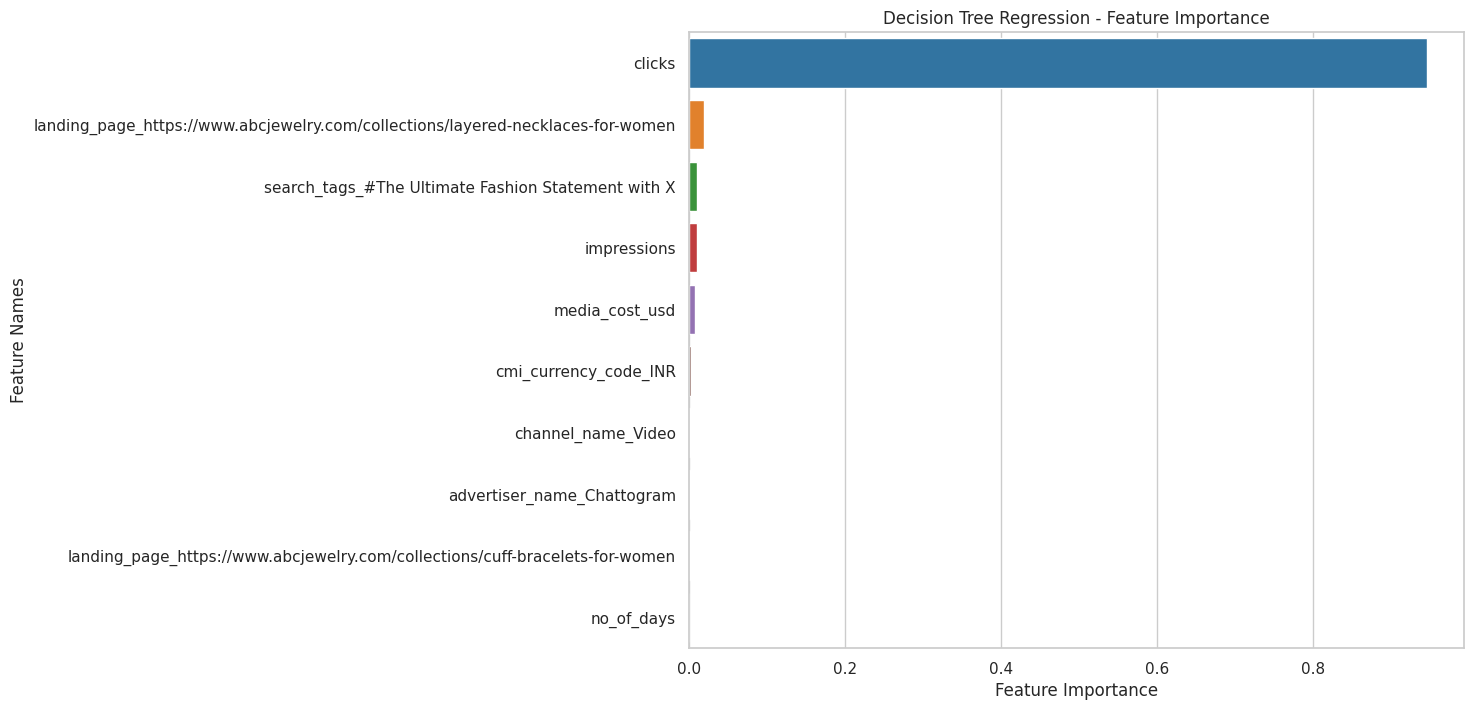

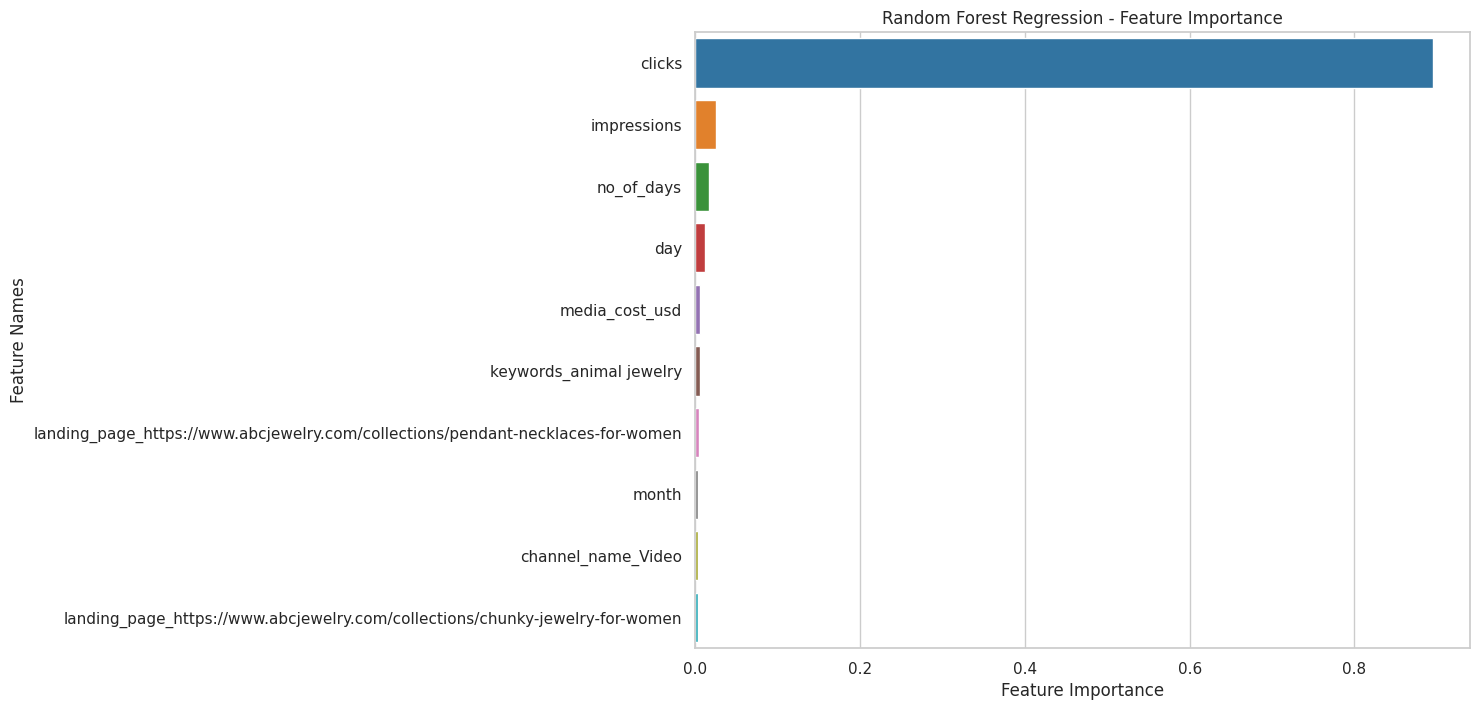

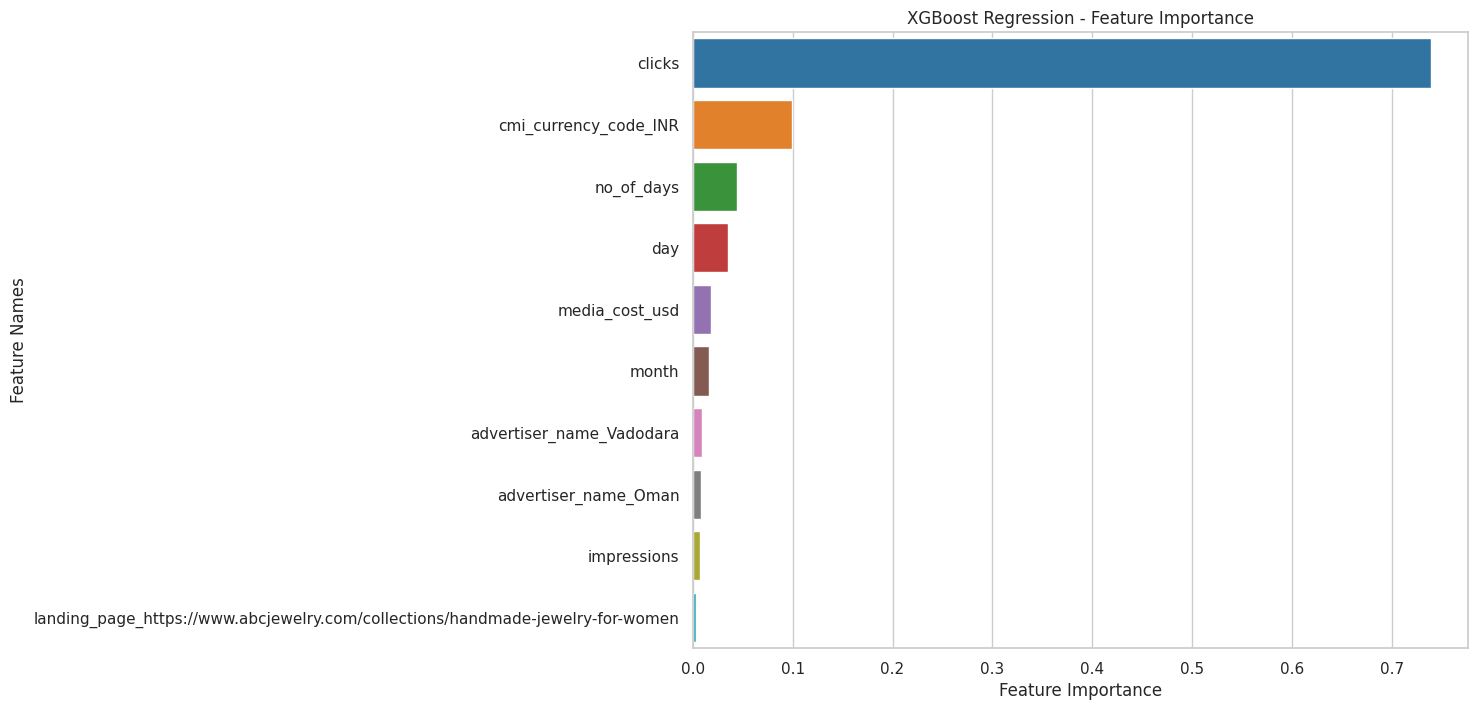

In [ ]:
# Define a function to plot feature importances
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# Get feature importances for each model
# linear_feature_importance = np.abs(linear_model.coef_)
decision_tree_feature_importance_3 = decision_tree_model_3.feature_importances_
random_forest_feature_importance_3 = random_forest_model_3.feature_importances_
xgboost_feature_importance_3 = xgboost_model_3.feature_importances_

# Split the data into training and testing sets
X_mc4_b = mc4_b_encoded.drop(columns=['ctr'])
y_mc4_b = mc4_b_encoded['ctr']

# Define the feature names (assuming you have X defined)
feature_names = X_mc4_b.columns

# Plot feature importances for each model
# plot_feature_importance(linear_feature_importance, feature_names, 'Linear Regression')
plot_feature_importance(decision_tree_feature_importance_3, feature_names, 'Decision Tree Regression')
# plt.savefig('mc4_DT_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_DT_fi.png') # Download the saved image to your local drive
plot_feature_importance(random_forest_feature_importance_3, feature_names, 'Random Forest Regression')
# plt.savefig('mc4_RF_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_RF_fi.png') # Download the saved image to your local drive
plot_feature_importance(xgboost_feature_importance_3, feature_names, 'XGBoost Regression')
# plt.savefig('mc4_XGB_fi.png', bbox_inches='tight') # Save the plot as an image file (e.g., PNG)
# files.download('mc4_XGB_fi.png') # Download the saved image to your local drive

plt.show()

In [ ]:
mc4_b_encoded.shape

(30468, 236)

# Models With The Best Performance

## SHAP EXPLAINER

In [ ]:
!pip install shap
# Upgrade SHAP
!pip install shap --upgrade
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Create a SHAP explainer for XGBoost Regression for mc3 dataset
explainer_xgboost_mc3 = shap.TreeExplainer(xgboost_model_1, mc3_encoded.drop(columns=['ctr']))
shap_values_xgboost_mc3 = explainer_xgboost_mc3.shap_values(mc3_encoded.drop(columns=['ctr']))

# Create a SHAP explainer for XGBoost Regression for mc4 dataset
explainer_xgboost_mc4 = shap.TreeExplainer(xgboost_model_2, mc4_encoded.drop(columns=['ctr']))
shap_values_xgboost_mc4 = explainer_xgboost_mc4.shap_values(mc4_encoded.drop(columns=['ctr']))

# Create a SHAP explainer for XGBoost Regression for mc4_b dataset
explainer_xgboost_mc4_b = shap.TreeExplainer(xgboost_model_3, mc4_b_encoded.drop(columns=['ctr']))
shap_values_xgboost_mc4_b = explainer_xgboost_mc4_b.shap_values(mc4_b_encoded.drop(columns=['ctr']))

# Create a SHAP explainer for Decision Tree Regression for mc4_b dataset
explainer_decision_tree_mc4_b = shap.TreeExplainer(decision_tree_model_3, mc4_b_encoded.drop(columns=['ctr']))
shap_values_decision_tree_mc4_b = explainer_decision_tree_mc4_b.shap_values(mc4_b_encoded.drop(columns=['ctr']))


[20:13:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
100%|===================| 30335/30468 [01:11<00:00]       

## Full SHAP Values

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


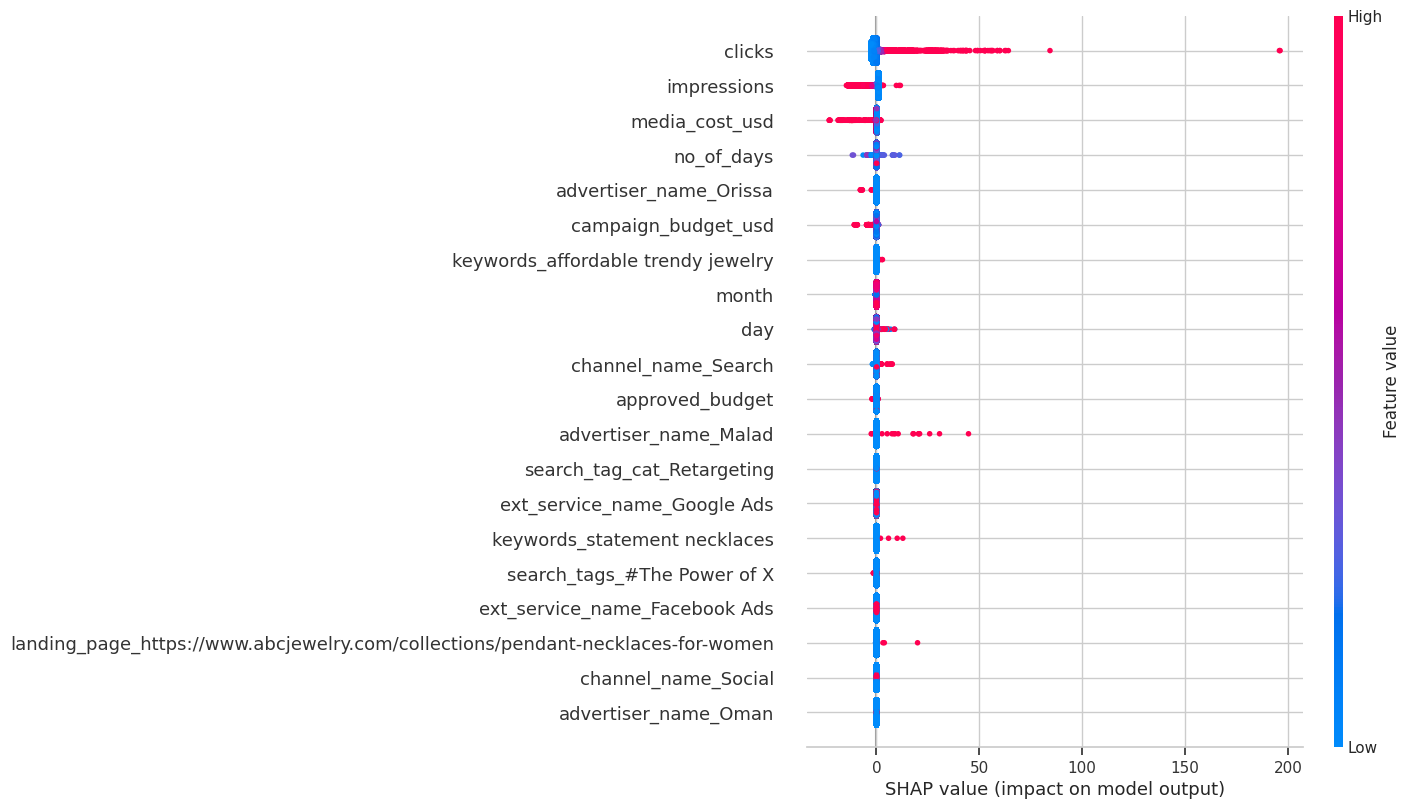

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


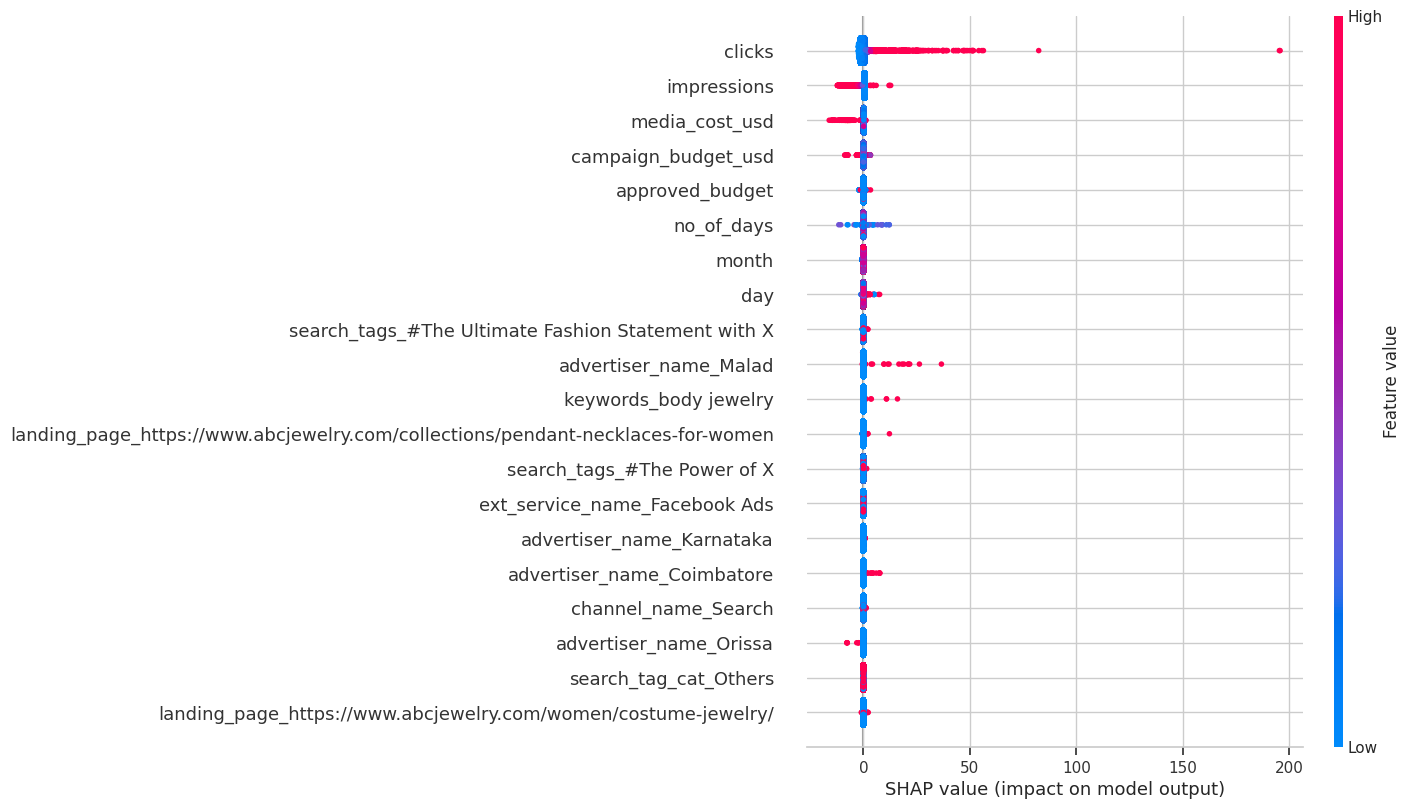

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


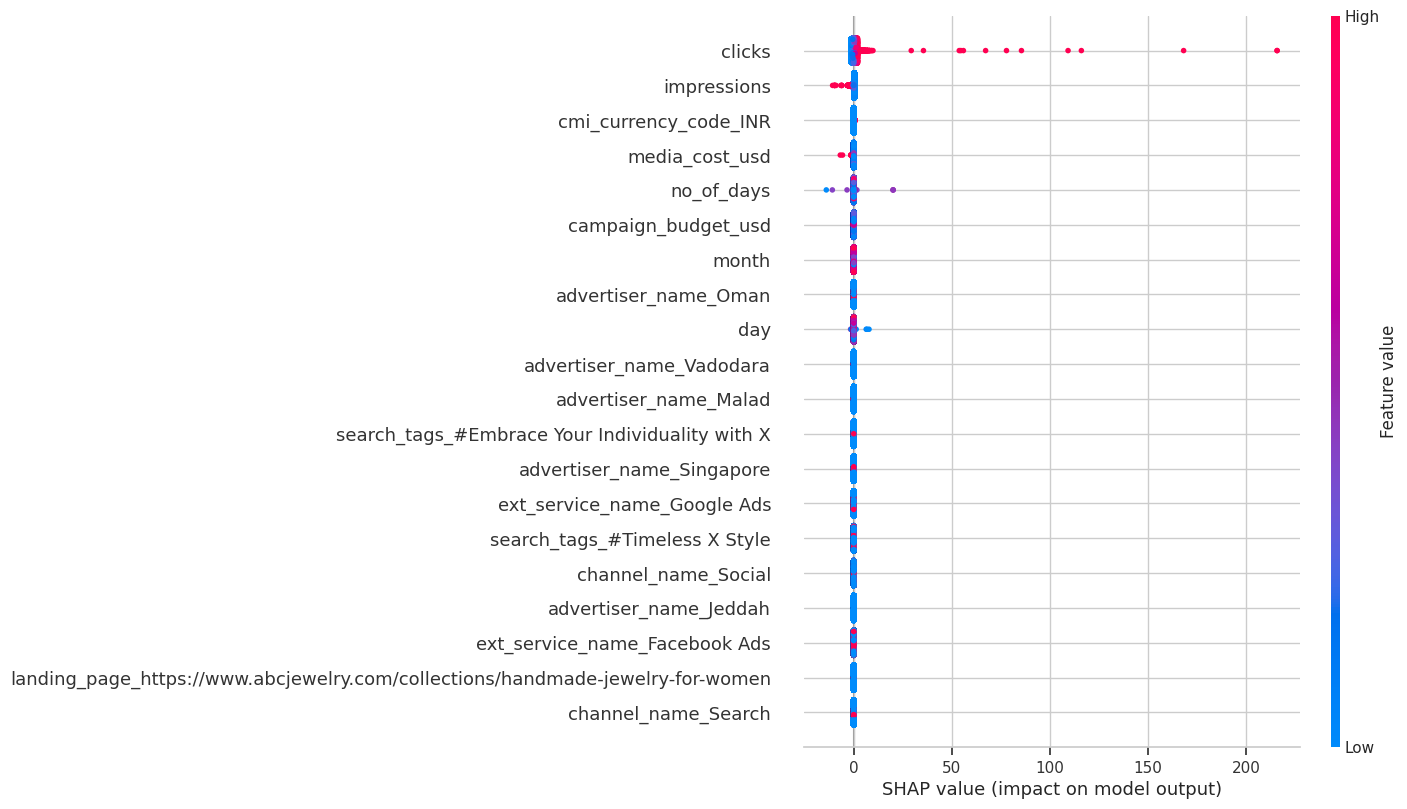

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


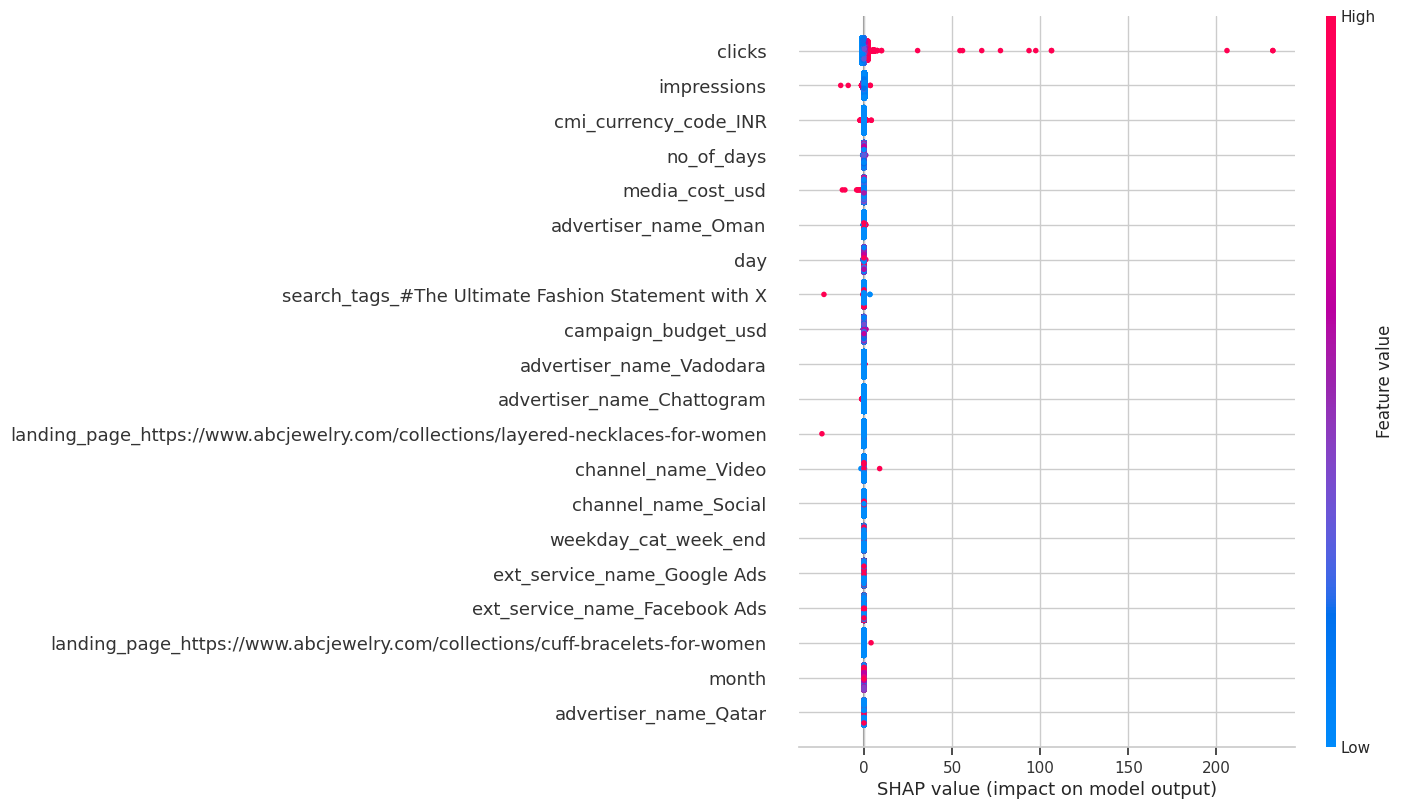

In [ ]:
# SHAP PLOT PARAMETERS
# shap.summary_plot(shap_values, features=None, feature_names=None, max_display=None,
#                   plot_type=None, color=None, axis_color='#333333',
#                   title=None, alpha=1, show=True, sort=True, color_bar=True,
#                   plot_size='auto', layered_violin_max_num_bins=20, class_names=None,
#                   class_inds=None, color_bar_label='Feature value',
#                   cmap=<matplotlib.colors.LinearSegmentedColormap object>,
#                   auto_size_plot=None, use_log_scale=False)

# Plot the SHAP values
# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc3 dataset
shap.summary_plot(shap_values_xgboost_mc3, mc3_encoded.drop(columns=['ctr']), title="SHAP Values for XGBoost Regression on mc3 dataset")
# plt.title("SHAP Summary Plot of top 10 features for mc3 XGBoost_model")
# plt.savefig('SHAP_tt_mc3_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)


# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc4 dataset
shap.summary_plot(shap_values_xgboost_mc4, mc4_encoded.drop(columns=['ctr']), title="SHAP Values for XGBoost Regression on mc4 dataset")
# plt.title("SHAP Summary Plot of top 10 features for XGBoost_model on mc4 dataset")
# plt.savefig('SHAP_tt_mc4_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)


# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc4_b dataset
shap.summary_plot(shap_values_xgboost_mc4_b, mc4_b_encoded.drop(columns=['ctr']), title="SHAP Values for XGBoost Regression on mc4_b dataset")
# plt.title("SHAP Summary Plot of top 10 features for XGBoost_model on mc4_b dataset")
# plt.savefig('SHAP_tt_mc4_b_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)

# Plot the SHAP values for the top 10 features of the Decision Tree Regression model on the mc4_b dataset
shap.summary_plot(shap_values_decision_tree_mc4_b, mc4_b_encoded.drop(columns=['ctr']), title="SHAP Values for Decision Tree Regression on mc4_b dataset")
# plt.title("SHAP Summary Plot of top 10 features for Decision Tree Model on mc4_b dataset")
# plt.savefig('SHAP_tt_mc4_b_DT.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)



## Top 10 SHAP Values

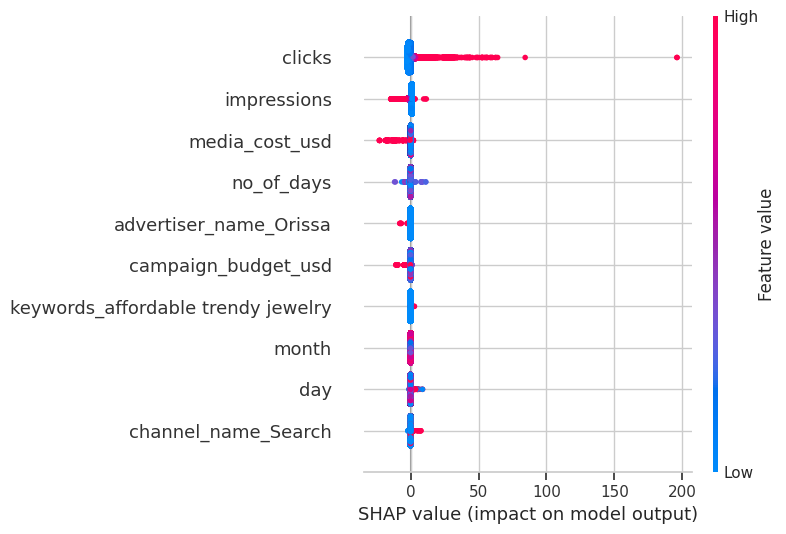

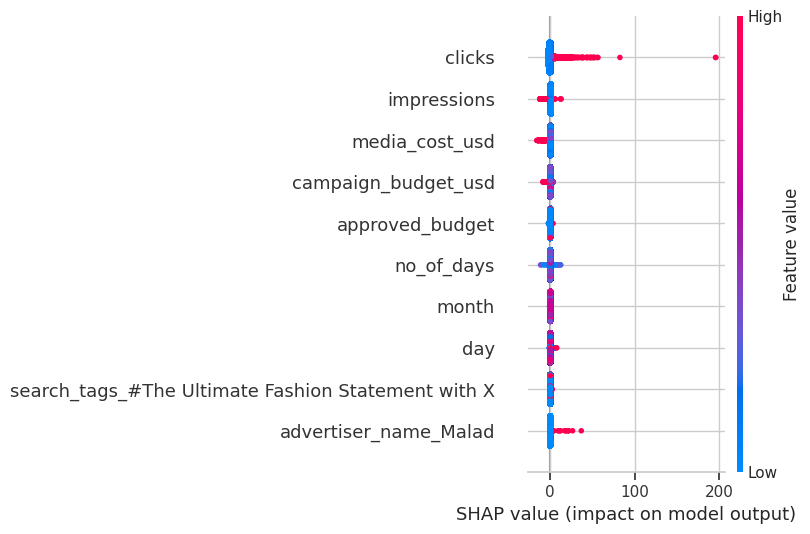

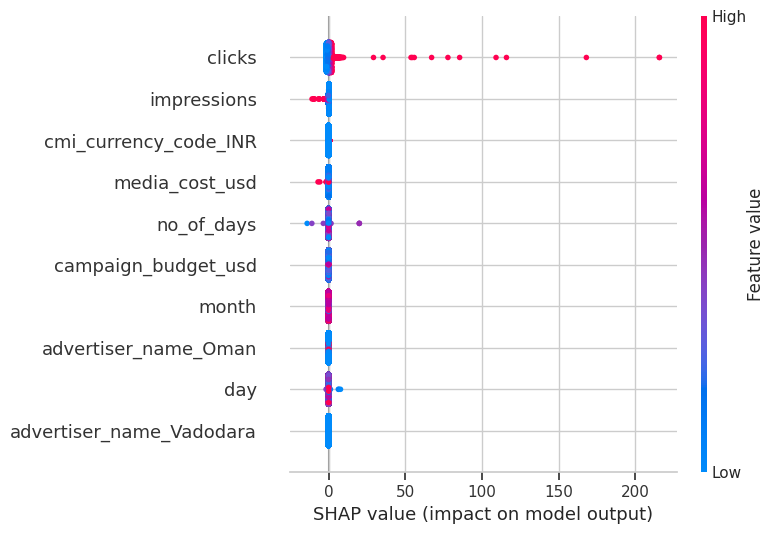

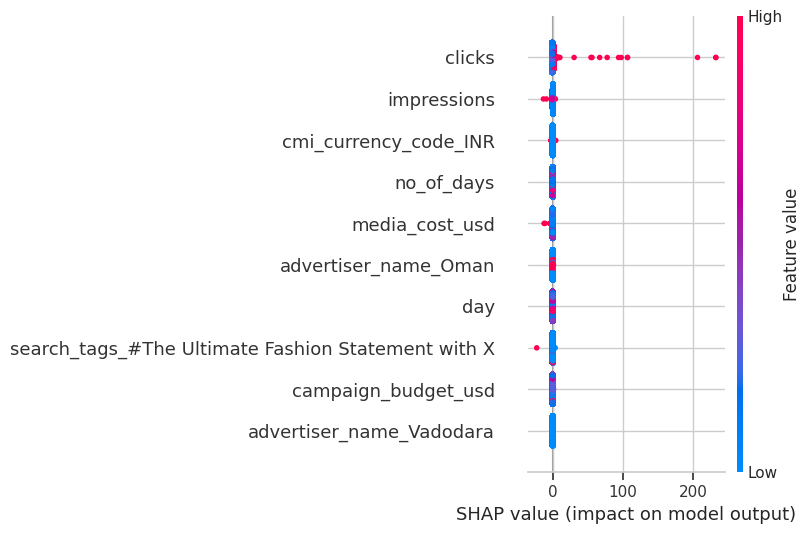

In [ ]:
# SHAP PLOT PARAMETERS
# shap.summary_plot(shap_values, features=None, feature_names=None, max_display=None,
#                   plot_type=None, color=None, axis_color='#333333',
#                   title=None, alpha=1, show=True, sort=True, color_bar=True,
#                   plot_size='auto', layered_violin_max_num_bins=20, class_names=None,
#                   class_inds=None, color_bar_label='Feature value',
#                   cmap=<matplotlib.colors.LinearSegmentedColormap object>,
#                   auto_size_plot=None, use_log_scale=False)

# Plot the SHAP values
# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc3 dataset
shap.summary_plot(shap_values_xgboost_mc3, mc3_encoded.drop(columns=['ctr']), max_display= 10, title="SHAP Values for XGBoost Regression on mc3 dataset")
# plt.title("SHAP Summary Plot of top 10 features for mc3 XGBoost_model")
# plt.savefig('SHAP_tt_mc3_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)


# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc4 dataset
shap.summary_plot(shap_values_xgboost_mc4, mc4_encoded.drop(columns=['ctr']), max_display= 10, title="SHAP Values for XGBoost Regression on mc4 dataset")
# plt.title("SHAP Summary Plot of top 10 features for XGBoost_model on mc4 dataset")
# plt.savefig('SHAP_tt_mc4_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)


# Plot the SHAP values for the top 10 features of the XGBoost Regression model on the mc4_b dataset
shap.summary_plot(shap_values_xgboost_mc4_b, mc4_b_encoded.drop(columns=['ctr']), max_display= 10, title="SHAP Values for XGBoost Regression on mc4_b dataset")
# plt.title("SHAP Summary Plot of top 10 features for XGBoost_model on mc4_b dataset")
# plt.savefig('SHAP_tt_mc4_b_XGB.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)

# Plot the SHAP values for the top 10 features of the Decision Tree Regression model on the mc4_b dataset
shap.summary_plot(shap_values_decision_tree_mc4_b, mc4_b_encoded.drop(columns=['ctr']), max_display= 10, title="SHAP Values for Decision Tree Regression on mc4_b dataset")
# plt.title("SHAP Summary Plot of top 10 features for Decision Tree Model on mc4_b dataset")
# plt.savefig('SHAP_tt_mc4_b_DT.png', bbox_inches='tight')  # Save the plot as an image file (e.g., PNG)



# Investigation and Comparison of Model Predictions and Actual Values

## For MC4_ENCODED

In [ ]:
# Split the data into training and testing sets
# X_mc4 = mc4_encoded.drop(columns=['ctr'])
# y_mc4 = mc4_encoded['ctr']
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mc4, y_mc4, test_size=0.3, random_state=42)

# Predict CTR for mc4 dataset using XGBoost and Random Forest models
xgboost_ctr_predictions = xgboost_model_2.predict(mc4_encoded.drop(columns=['ctr']))
random_forest_ctr_predictions = random_forest_model_2.predict(mc4_encoded.drop(columns=['ctr']))

# Add the predictions as new columns
mc4_encoded['XGBoost_CTR_Prediction'] = xgboost_ctr_predictions
mc4_encoded['RandomForest_CTR_Prediction'] = random_forest_ctr_predictions

# To capture the precision for the XGBoost predictions for instances close or equal to actual ctr value
# Add binary columns to indicate if predicted CTR is overestimated (1) or underestimated (0) or equal to actual ctr values (2)
mc4_encoded['XGBoost_Overestimated'] = np.select([(mc4_encoded['XGBoost_CTR_Prediction'] > mc4_encoded['ctr'] + 0.0001),
 (mc4_encoded['XGBoost_CTR_Prediction'] < mc4_encoded['ctr'] - 0.0001),],[1, 0], 2).astype(int)

mc4_encoded['RandomForest_Overestimated'] = np.where(mc4_encoded['RandomForest_CTR_Prediction'] > mc4_encoded['ctr'], 1,
                                                np.where(mc4_encoded['RandomForest_CTR_Prediction'] < mc4_encoded['ctr'], 0, 2)).astype(int)

mc4_encoded['XGBoost_Underestimated'] = np.select([(mc4_encoded['XGBoost_CTR_Prediction'] < mc4_encoded['ctr'] + 0.0001),
 (mc4_encoded['XGBoost_CTR_Prediction'] > mc4_encoded['ctr'] - 0.0001),],[1, 0], 2).astype(int)

mc4_encoded['RandomForest_Underestimated'] = np.where(mc4_encoded['RandomForest_CTR_Prediction'] < mc4_encoded['ctr'], 1,
                                                np.where(mc4_encoded['RandomForest_CTR_Prediction'] > mc4_encoded['ctr'], 0, 2)).astype(int)


In [ ]:
# Display the updated dataset with predictions and over/underestimation indicators
top_10_val_mc4 = mc4_encoded[['ctr','XGBoost_CTR_Prediction',	'RandomForest_CTR_Prediction', 'XGBoost_Overestimated', 'RandomForest_Overestimated', 'XGBoost_Underestimated',	'RandomForest_Underestimated']].sort_values(by='ctr', ascending=False)

# Remove the index column
# top_10_val_mc4.reset_index(drop=True, inplace=True)

top_10_val_mc4.head(10)

ctr  XGBoost_CTR_Prediction  RandomForest_CTR_Prediction  \
16255  265.611691              236.436539                   180.830601   
16254  236.477935              236.389877                   198.575670   
16256  184.370814              183.864838                   145.875295   
16253  107.507804              107.063087                    95.640420   
16252   94.102990               94.125160                    95.543974   
16168   88.551947               64.524582                    67.758855   
16222   87.651332               72.647934                    65.755018   
21630   85.479720               85.024696                    79.181511   
16160   84.729818               84.629097                    78.359767   
21603   81.964063               81.293015                    74.377027   

       XGBoost_Overestimated  RandomForest_Overestimated  \
16255                      0                           0   
16254                      0                           0   
16256                      0                           0   
16253                      0                           0   
16252                      1                           1   
16168                      0                           0   
16222                      0                           0   
21630                      0                           0   
16160                      0                           0   
21603                      0                           0   

       XGBoost_Underestimated  RandomForest_Underestimated  
16255                       1                            1  
16254                       1                            1  
16256                       1                            1  
16253                       1                            1  
16252                       0                            0  
16168                       1                            1  
16222                       1                            1  
21630                       1                            1  
16160                       1                            1  
21603                       1                            1

In [ ]:
# shap.plots.waterfall(shap_values[0])
# print(shap_values_decision_tree_mc4_b)

# Split the data into training and testing sets
X_mc4 = mc4_encoded.drop(columns=['ctr'])
y_mc4 = mc4_encoded['ctr']

# Load the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mc4, y_mc4, test_size=0.3, random_state=42)


In [ ]:
# to locate instance for shap values
X_test_2.loc[16168]

no_of_days                         5.000000
approved_budget                15000.000000
campaign_budget_usd              741.015191
impressions                     5573.000000
clicks                          4935.000000
                                   ...     
RandomForest_CTR_Prediction       67.758855
XGBoost_Overestimated              0.000000
RandomForest_Overestimated         0.000000
XGBoost_Underestimated             1.000000
RandomForest_Underestimated        1.000000
Name: 16168, Length: 241, dtype: float64

[15:04:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


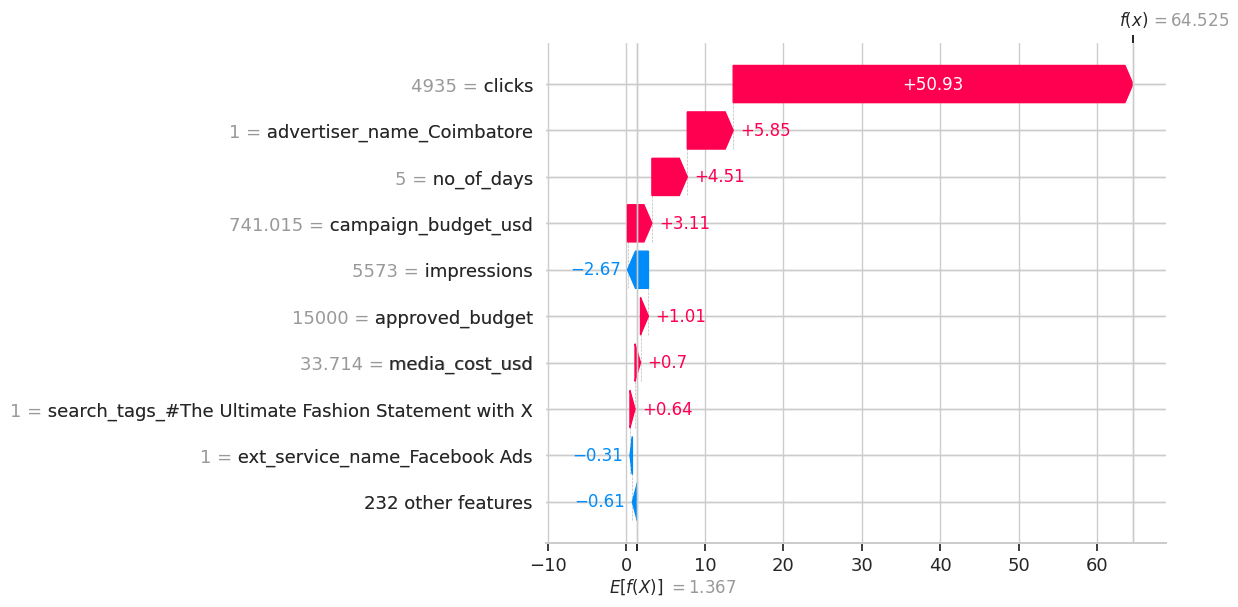

In [ ]:
# For XGBoost_model_2 instance at index 16168
# # Explain the model's predictions using SHAP
explainer2_a1 = shap.TreeExplainer(xgboost_model_2, X_test_2)
shap_values2_a1 = explainer2_a1.shap_values(X_test_2.loc[16168])

# define index
instance_idx = 16168

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values2_a1,
                                     base_values=explainer2_a1.expected_value,
                                     data=X_test_2.loc[instance_idx],
                                     feature_names=X_test_2.columns.tolist()))


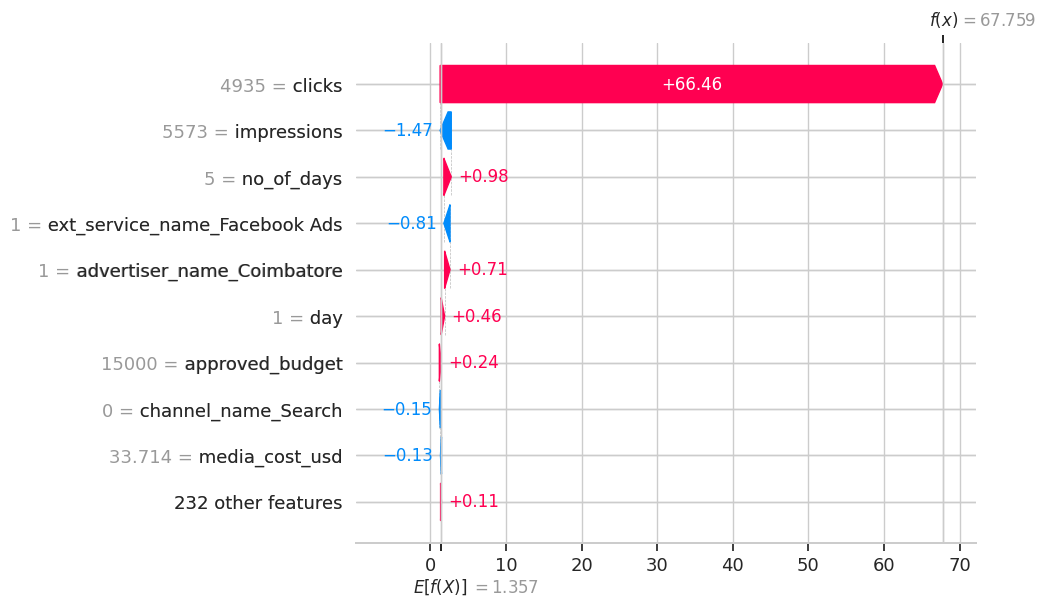

In [ ]:
# For random_forest_model_2 instance at index 6168
# # Explain the model's predictions using SHAP
explainer2_b1 = shap.TreeExplainer(random_forest_model_2, X_test_2)
shap_values2_b1 = explainer2_b1.shap_values(X_test_2.loc[16168])

# define index
instance_idx = 16168

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values2_b1,
                                     base_values=explainer2_b1.expected_value,
                                     data=X_test_2.loc[instance_idx],
                                     feature_names=X_test_2.columns.tolist()))


In [ ]:
'''Display the updated dataset with 5 instances where predictions one a prediction has been
overestimated by one model and underestimated by the other model'''
over_under_val_mc4 = mc4_encoded[['ctr','XGBoost_CTR_Prediction',	'RandomForest_CTR_Prediction', 'XGBoost_Overestimated', 'RandomForest_Overestimated', 'XGBoost_Underestimated',	'RandomForest_Underestimated']].sort_values(by='ctr', ascending=False)

# Remove the index column
# over_under_val_mc4.reset_index(drop=True, inplace=True)

over_under_val_mc4[over_under_val_mc4['XGBoost_Overestimated'] != over_under_val_mc4['RandomForest_Overestimated']].sample(5, random_state=30)


ctr  XGBoost_CTR_Prediction  RandomForest_CTR_Prediction  \
34724  2.098260                2.161486                     2.093611   
36289  1.403250                1.386591                     1.406942   
14248  1.746725                1.731792                     1.746903   
30701  0.378072                0.387543                     0.378072   
29124  1.140684                1.151720                     1.140684   

       XGBoost_Overestimated  RandomForest_Overestimated  \
34724                      1                           0   
36289                      0                           1   
14248                      0                           1   
30701                      1                           0   
29124                      1                           0   

       XGBoost_Underestimated  RandomForest_Underestimated  
34724                       0                            1  
36289                       1                            0  
14248                       1                            0  
30701                       0                            1  
29124                       0                            1

[14:29:28] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


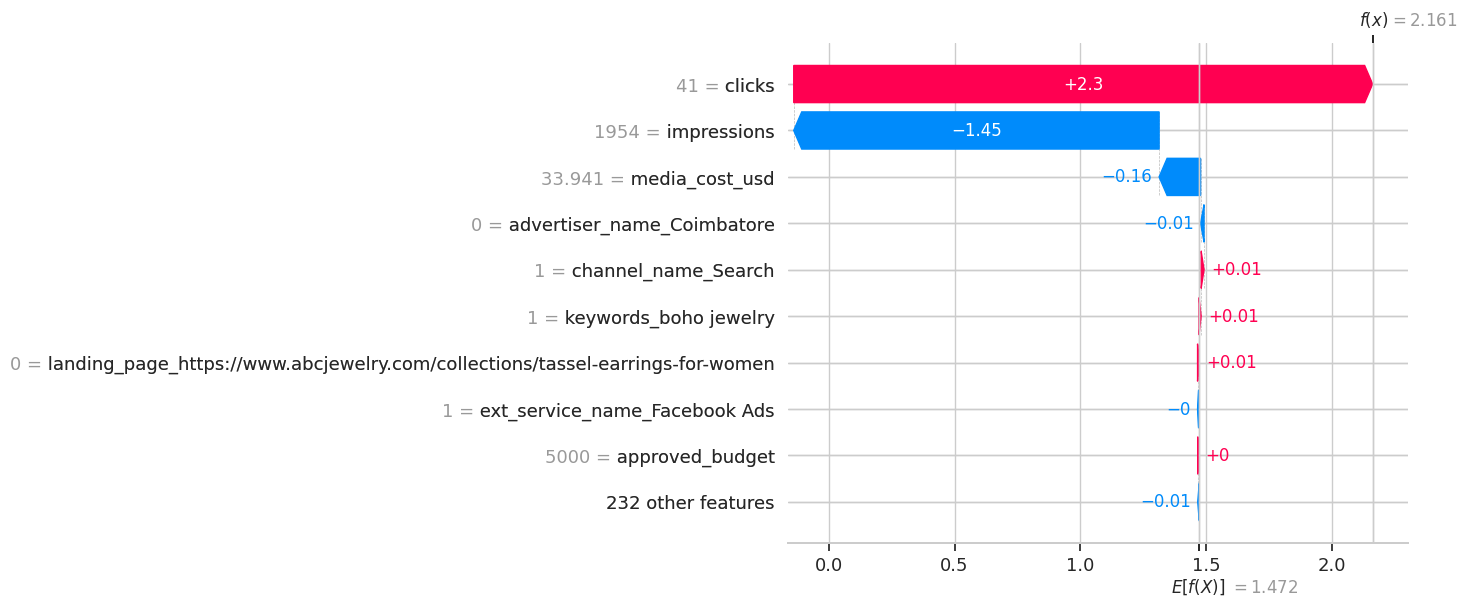

In [ ]:
# For XGBoost_model_2 instance
# # Explain the model's predictions using SHAP
explainer2_a = shap.TreeExplainer(xgboost_model_2, X_train_2)
shap_values2_a = explainer2_a.shap_values(X_train_2.loc[34724])

# Find the index of the specific value in XGBoost_CTR_Prediction - method used due to precision issue in the predicted value
tolerance = 0.001
specific_value = 2.161486

# Find the index of the nearest value within the tolerance
mask = (X_train_2['XGBoost_CTR_Prediction'] >= specific_value - tolerance) & (X_train_2['XGBoost_CTR_Prediction'] <= specific_value + tolerance)
matching_indices = X_train_2.index[mask]
instance_idx = matching_indices[4]

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values2_a,
                                     base_values=explainer2_a.expected_value,
                                     data=X_train_2.loc[instance_idx],
                                     feature_names=X_train_2.columns.tolist()))


In [ ]:
# locate index for SHAP values
X_train_2.loc[34724]

no_of_days                       16.000000
approved_budget                5000.000000
campaign_budget_usd             272.479564
impressions                    1954.000000
clicks                           41.000000
                                  ...     
RandomForest_CTR_Prediction       2.093611
XGBoost_Overestimated             1.000000
RandomForest_Overestimated        0.000000
XGBoost_Underestimated            0.000000
RandomForest_Underestimated       1.000000
Name: 34724, Length: 241, dtype: float64

In [ ]:
# Find the index of the specific value in RandomForest_CTR_Prediction
tolerance = 0.001
specific_value = 2.093611

# Find the index of the nearest value within the tolerance
mask = (X_train_2['RandomForest_CTR_Prediction'] >= specific_value - tolerance) & (X_train_2['RandomForest_CTR_Prediction'] <= specific_value + tolerance)
matching_indices = X_train_2.index[mask]
instance_idx = matching_indices[8]
instance_idx
# matching_indices

34724

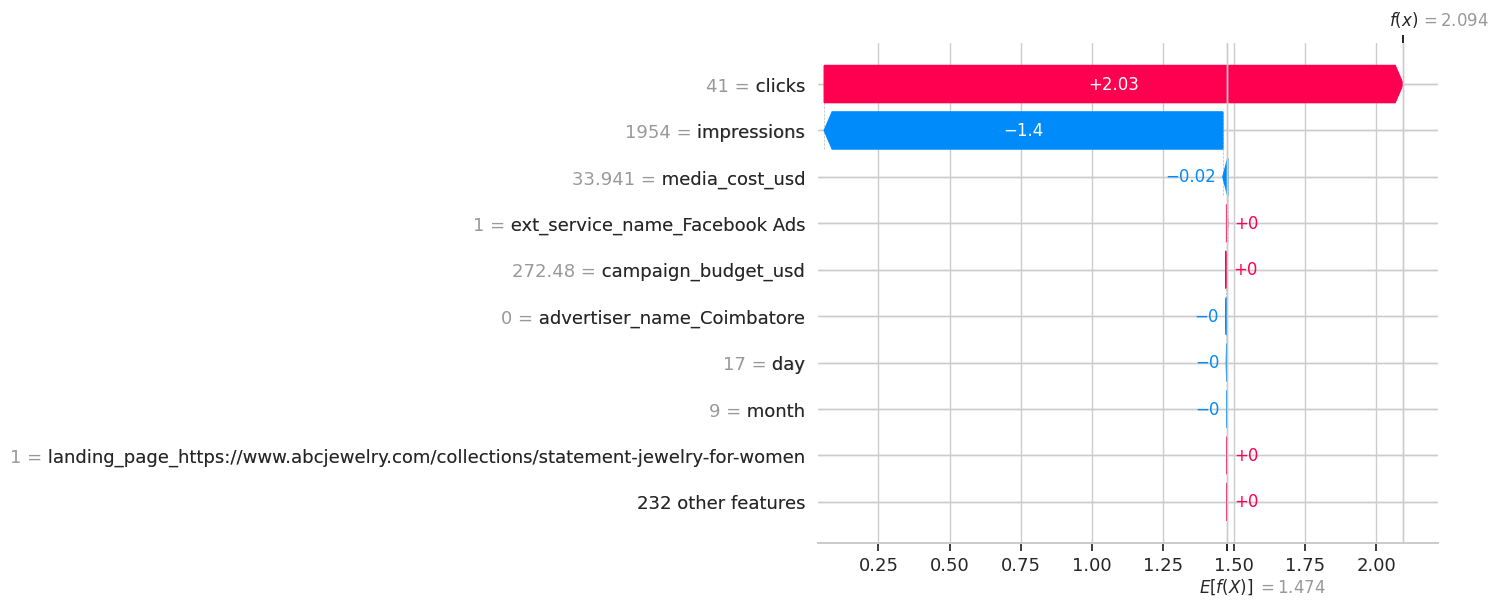

In [ ]:
# For random_forest_model_2 instance
# # Explain the model's predictions using SHAP
explainer2_b = shap.TreeExplainer(random_forest_model_2, X_train_2)
shap_values2_b = explainer2_b.shap_values(X_train_2.loc[34724])

# Find the index of the specific value in RandomForest_CTR_Prediction
tolerance = 0.001
specific_value = 2.093611

# Find the index of the nearest value within the tolerance
mask = (X_train_2['RandomForest_CTR_Prediction'] >= specific_value - tolerance) & (X_train_2['RandomForest_CTR_Prediction'] <= specific_value + tolerance)
matching_indices = X_train_2.index[mask]
instance_idx = matching_indices[8]

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values2_b,
                                     base_values=explainer2_b.expected_value,
                                     data=X_train_2.loc[instance_idx],
                                     feature_names=X_train_2.columns.tolist()))


In [ ]:
# To confirm the number instances where XGBoost predicted values are close to or equal to the actual ctr values.
top_10_val_mc4[top_10_val_mc4['XGBoost_Overestimated'] == 2].count()

ctr                            552
XGBoost_CTR_Prediction         552
RandomForest_CTR_Prediction    552
XGBoost_Overestimated          552
RandomForest_Overestimated     552
XGBoost_Underestimated         552
RandomForest_Underestimated    552
dtype: int64

In [ ]:
mc4_encoded.loc[16168]

no_of_days                         5.000000
approved_budget                15000.000000
campaign_budget_usd              741.015191
impressions                     5573.000000
clicks                          4935.000000
                                   ...     
RandomForest_CTR_Prediction       67.758855
XGBoost_Overestimated              0.000000
RandomForest_Overestimated         0.000000
XGBoost_Underestimated             1.000000
RandomForest_Underestimated        1.000000
Name: 16168, Length: 242, dtype: float64

## For MC4_B_ENCODED

In [ ]:
# Predict CTR for mc4 dataset using XGBoost and Random Forest models
xgboost_ctr_predictions_b = xgboost_model_3.predict(mc4_b_encoded.drop(columns=['ctr']))
decision_tree_ctr_predictions_b = decision_tree_model_3.predict(mc4_b_encoded.drop(columns=['ctr']))

# Add the predictions as new columns
mc4_b_encoded['XGBoost_CTR_Prediction'] = xgboost_ctr_predictions_b
mc4_b_encoded['DecisionTree_CTR_Prediction'] = decision_tree_ctr_predictions_b

# To capture the precision for the XGBoost predictions for instances close or equal to actual ctr value
# Add binary columns to indicate if predicted CTR is overestimated (1) or underestimated (0) or equal to actual ctr values (2)
mc4_b_encoded['XGBoost_Overestimated'] = np.select([(mc4_b_encoded['XGBoost_CTR_Prediction'] > mc4_b_encoded['ctr'] + 0.0001),
 (mc4_b_encoded['XGBoost_CTR_Prediction'] < mc4_b_encoded['ctr'] - 0.0001),],[1, 0], 2).astype(int)

mc4_b_encoded['DecisionTree_Overestimated'] = np.where(mc4_b_encoded['DecisionTree_CTR_Prediction'] > mc4_b_encoded['ctr'], 1,
                                                np.where(mc4_b_encoded['DecisionTree_CTR_Prediction'] < mc4_b_encoded['ctr'], 0, 2)).astype(int)

mc4_b_encoded['XGBoost_Underestimated'] = np.select([(mc4_b_encoded['XGBoost_CTR_Prediction'] < mc4_b_encoded['ctr'] + 0.0001),
 (mc4_b_encoded['XGBoost_CTR_Prediction'] > mc4_b_encoded['ctr'] - 0.0001),],[1, 0], 2).astype(int)

mc4_b_encoded['DecisionTree_Underestimated'] = np.where(mc4_b_encoded['DecisionTree_CTR_Prediction'] < mc4_b_encoded['ctr'], 1,
                                                np.where(mc4_b_encoded['DecisionTree_CTR_Prediction'] > mc4_b_encoded['ctr'], 0, 2)).astype(int)



In [ ]:
# Display the updated dataset with predictions and over/underestimation indicators
top_10_val_b = mc4_b_encoded[['ctr','XGBoost_CTR_Prediction',	'DecisionTree_CTR_Prediction',
                              'XGBoost_Overestimated',	'DecisionTree_Overestimated',
                              'XGBoost_Underestimated',	'DecisionTree_Underestimated'
                              ]].sort_values(by='ctr', ascending=False)
top_10_val_b.head(10)

ctr  XGBoost_CTR_Prediction  DecisionTree_CTR_Prediction  \
16255  265.611691              236.238022                   236.477935   
16254  236.477935              236.452194                   236.477935   
16256  184.370814              184.368042                   184.370814   
16253  107.507804              107.511452                   107.507804   
16252   94.102990               94.082375                    94.102990   
16222   87.651332               87.640381                    87.651332   
16257   81.871436               81.879005                    81.871436   
16258   75.876289               44.313919                   107.507804   
16223   66.340058               66.350777                    66.340058   
16251   46.779559               46.778763                    46.779559   

       XGBoost_Overestimated  DecisionTree_Overestimated  \
16255                      0                           0   
16254                      0                           2   
16256                      0                           2   
16253                      1                           2   
16252                      0                           2   
16222                      0                           2   
16257                      1                           2   
16258                      0                           1   
16223                      1                           2   
16251                      0                           2   

       XGBoost_Underestimated  DecisionTree_Underestimated  
16255                       1                            1  
16254                       1                            2  
16256                       1                            2  
16253                       0                            2  
16252                       1                            2  
16222                       1                            2  
16257                       0                            2  
16258                       1                            0  
16223                       0                            2  
16251                       1                            2

In [ ]:
# shap.plots.waterfall(shap_values[0])
# print(shap_values_decision_tree_mc4_b)

# Split the data into training and testing sets
X_mc4_b = mc4_b_encoded.drop(columns=['ctr'])
y_mc4_b = mc4_b_encoded['ctr']

# Load the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_mc4_b, y_mc4_b, test_size=0.3, random_state=42)


[14:44:39] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


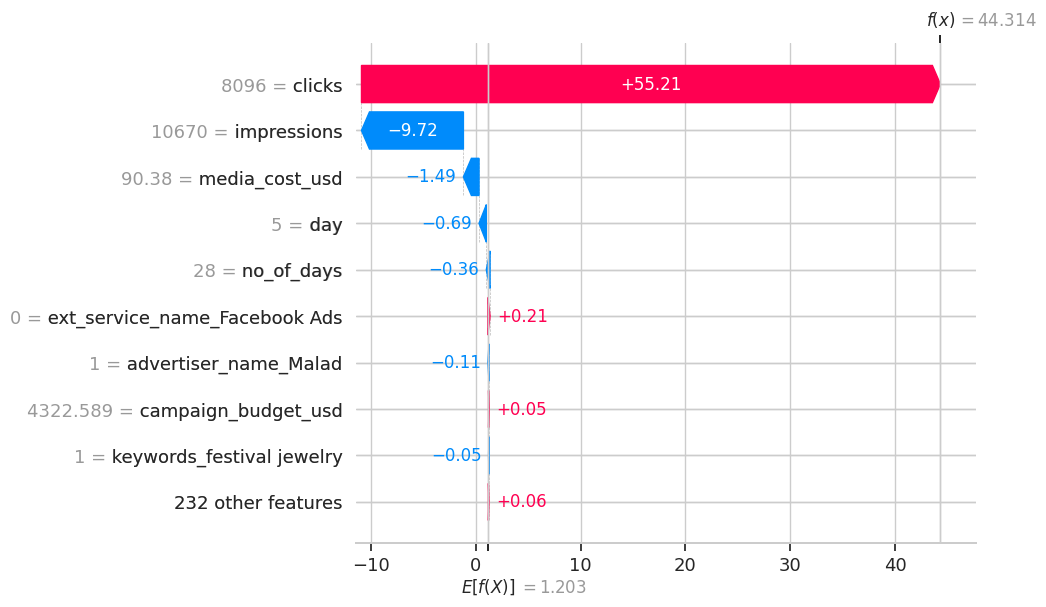

In [ ]:
# For XGBoost_model_3 instance at index 16258
# # Explain the model's predictions using SHAP
explainer3_a = shap.TreeExplainer(xgboost_model_3, X_test_3)
shap_values3_a = explainer3_a.shap_values(X_test_3.loc[16258])

# Find the index of the specific value in XGBoost_CTR_Prediction
specific_value = 44.313919
instance_idx = X_test_3[X_test_3['XGBoost_CTR_Prediction'] == specific_value].index[0]

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values3_a,
                                     base_values=explainer3_a.expected_value,
                                     data=X_test_3.loc[instance_idx],
                                     feature_names=X_test_3.columns.tolist()))


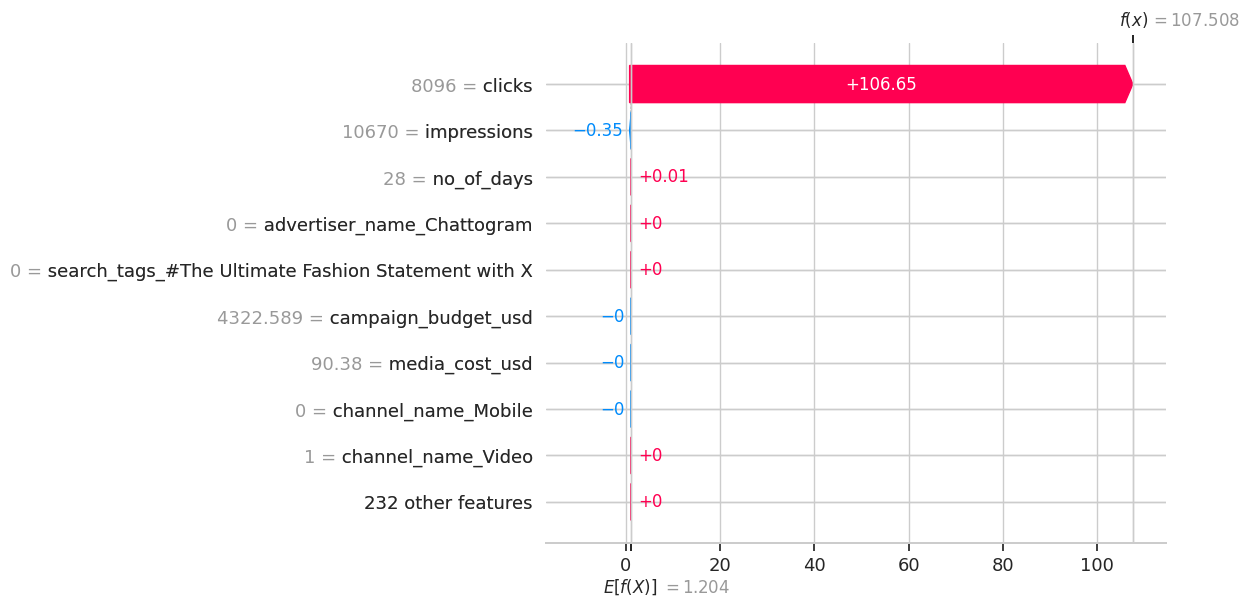

In [ ]:
# For decision_tree_model_3 instance at index 16258
# # Explain the model's predictions using SHAP
explainer3_b = shap.TreeExplainer(decision_tree_model_3, X_test_3)
shap_values3_b = explainer3_b.shap_values(X_test_3.loc[16258])

# Find the index of the specific value in DecisionTree_CTR_Prediction
tolerance = 0.001
specific_value = 107.507804

# Find the index of the nearest value within the tolerance
mask = (X_test_3['DecisionTree_CTR_Prediction'] >= specific_value - tolerance) & (X_test_3['DecisionTree_CTR_Prediction'] <= specific_value + tolerance)
matching_indices = X_test_3.index[mask]
instance_idx = matching_indices[0]

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values3_b,
                                     base_values=explainer3_b.expected_value,
                                     data=X_test_3.loc[instance_idx],
                                     feature_names=X_test_3.columns.tolist()))


In [ ]:
# Find the index of a specific value in XGBoost_CTR_Prediction column
specific_value = 44.313919  # Replace this with the value you want to find the index for
index_of_value = X_test_3[X_test_3['XGBoost_CTR_Prediction'] == specific_value].index.tolist()

print("Index of the specified value:", index_of_value)

Index of the specified value: [16258]


In [ ]:
X_test_3.loc[16258]

no_of_days                        28.000000
approved_budget                10000.000000
campaign_budget_usd             4322.588613
impressions                    10670.000000
clicks                          8096.000000
                                   ...     
DecisionTree_CTR_Prediction      107.507804
XGBoost_Overestimated              0.000000
DecisionTree_Overestimated         1.000000
XGBoost_Underestimated             1.000000
DecisionTree_Underestimated        0.000000
Name: 16258, Length: 241, dtype: float64

In [ ]:
'''Display the updated dataset with 5 instances where predictions one a prediction has been
overestimated by one model and underestimated by the other model'''
over_under_val_b = mc4_b_encoded[['ctr','XGBoost_CTR_Prediction',	'DecisionTree_CTR_Prediction', 'XGBoost_Overestimated', 'DecisionTree_Overestimated', 'XGBoost_Underestimated',	'DecisionTree_Underestimated']].sort_values(by='ctr', ascending=False)

# Remove the index column
# over_under_val_b.reset_index(drop=True, inplace=True)

over_under_val_b[over_under_val_b['XGBoost_Overestimated'] != over_under_val_b['DecisionTree_Overestimated']].sample(5, random_state=3)


ctr  XGBoost_CTR_Prediction  DecisionTree_CTR_Prediction  \
44355  1.592357                1.606993                     1.592357   
69198  0.951557                0.948263                     0.951557   
22689  1.204819                1.200340                     1.204819   
58541  1.098901                1.101856                     1.098901   
46025  0.770925                0.767381                     0.770925   

       XGBoost_Overestimated  DecisionTree_Overestimated  \
44355                      1                           2   
69198                      0                           2   
22689                      0                           1   
58541                      1                           2   
46025                      0                           2   

       XGBoost_Underestimated  DecisionTree_Underestimated  
44355                       0                            2  
69198                       1                            2  
22689                       1                            0  
58541                       0                            2  
46025                       1                            2

In [ ]:
X_train_3.loc[44355]

no_of_days                        37.000000
approved_budget                10000.000000
campaign_budget_usd              625.340599
impressions                      628.000000
clicks                            10.000000
                                   ...     
DecisionTree_CTR_Prediction        1.592357
XGBoost_Overestimated              1.000000
DecisionTree_Overestimated         2.000000
XGBoost_Underestimated             0.000000
DecisionTree_Underestimated        2.000000
Name: 44355, Length: 241, dtype: float64

[14:52:36] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


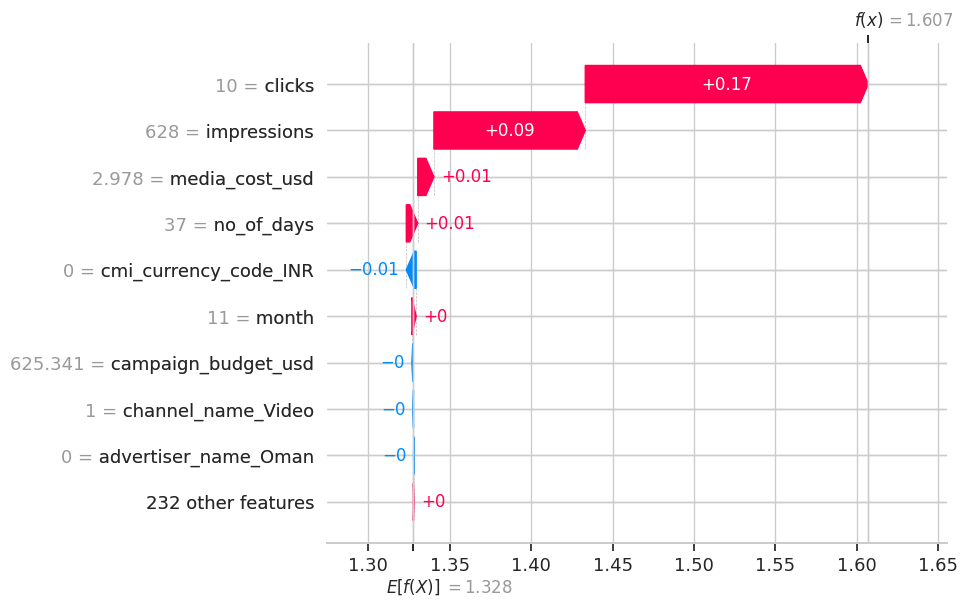

In [ ]:
# For XGBoost_model_3 instance
# # Explain the model's predictions using SHAP
explainer3_a2 = shap.TreeExplainer(xgboost_model_3, X_train_3)
shap_values3_a2 = explainer3_a2.shap_values(X_train_3.loc[44355])

# Find the index of the specific value in XGBoost_CTR_Prediction
# specific_value = 1.606993
# instance_idx = X_test_3[X_test_3['XGBoost_CTR_Prediction'] == specific_value].index[0]
instance_idx = 44355

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values3_a2,
                                     base_values=explainer3_a2.expected_value,
                                     data=X_train_3.loc[instance_idx],
                                     feature_names=X_train_3.columns.tolist()))


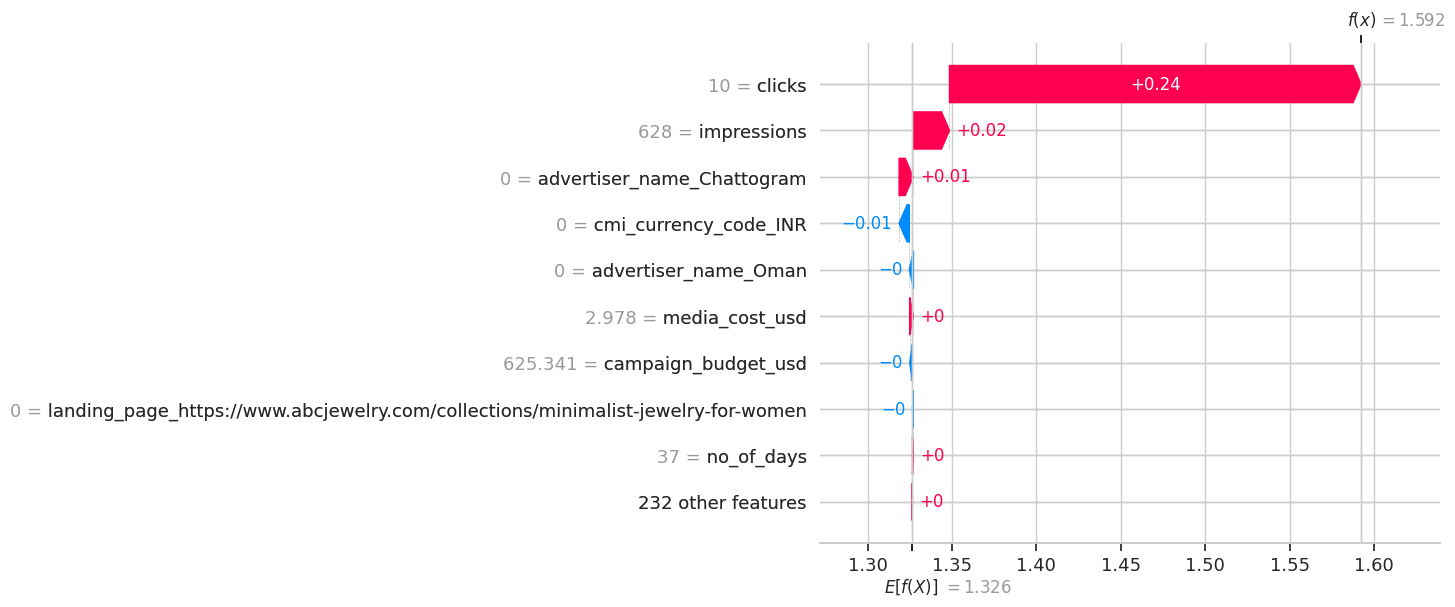

In [ ]:
# For decision_tree_model_3 instance
# # Explain the model's predictions using SHAP
explainer3_b2 = shap.TreeExplainer(decision_tree_model_3, X_train_3)
shap_values3_b2 = explainer3_b2.shap_values(X_train_3.loc[44355])

# define the index
instance_idx = 44355

# Create a SHAP waterfall plot for the chosen instance
shap.initjs()  # Initialize JavaScript for visualizations in Jupyter Notebook

shap.waterfall_plot(shap.Explanation(values=shap_values3_b2,
                                     base_values=explainer3_b2.expected_value,
                                     data=X_train_3.loc[instance_idx],
                                     feature_names=X_train_3.columns.tolist()))


In [ ]:
mc4_b.loc[16258]

no_of_days                                                         28
ext_service_name                                                DV360
search_tags                                            #Be Bold. Be X
landing_page           https://www.abcjewelry.com/women/boho-jewelry/
advertiser_name                                                 Malad
approved_budget                                               10000.0
channel_name                                                    Video
campaign_budget_usd                                       4322.588613
impressions                                                     10670
clicks                                                           8096
exchange_rate                                                       1
media_cost_usd                                              90.380054
search_tag_cat                                                 Others
cmi_currency_code                                                 INR
timezone            

In [ ]:
# to investigate the unusual observations in the predictions on dataframe
mc4_b.merge(top_10_val_b, how='inner', on='ctr').sort_values(by='ctr', ascending=False).sample(3)


no_of_days ext_service_name                         search_tags  \
24267           13     Facebook Ads                     #The Power of X   
326113          36       Google Ads  #Embrace Your Individuality with X   
592165          47            DV360                   #Timeless X Style   

                                             landing_page advertiser_name  \
24267   https://www.abcjewelry.com/collections/boho-je...       Singapore   
326113  https://www.abcjewelry.com/collections/pearl-j...           Qatar   
592165  https://www.abcjewelry.com/collections/delicat...       Singapore   

        approved_budget channel_name  campaign_budget_usd  impressions  \
24267           10000.0       Social           343.324251          545   
326113          10000.0      Display            13.896458          513   
592165          10000.0       Social           404.632153          515   

        clicks  exchange_rate  media_cost_usd search_tag_cat  \
24267        7              1        1.152147         Others   
326113       2              1        0.130466         Others   
592165       9              1        0.199432         Others   

       cmi_currency_code      timezone weekday_cat                keywords  \
24267                AED  Asia/Kolkata    week_day       religious jewelry   
326113               AED  Asia/Kolkata    week_day          modern jewelry   
592165               AED  Asia/Kolkata    week_day  multi-strand necklaces   

             ctr  year  month  day  XGBoost_CTR_Prediction  \
24267   1.284404  2022     10    6                1.291044   
326113  0.389864  2022     10   22                0.391112   
592165  1.747573  2022     11   30                1.748376   

        DecisionTree_CTR_Prediction  XGBoost_Overestimated  \
24267                      1.284404                      1   
326113                     0.389864                      1   
592165                     1.747573                      1   

        DecisionTree_Overestimated  XGBoost_Underestimated  \
24267                            2                       0   
326113                           1                       0   
592165                           0                       0   

        DecisionTree_Underestimated  
24267                             2  
326113                            0  
592165                            1

# END